# A1: Classification Model Development (Individual) </h2>

## Introduction

The following classification model and analysis is based on the Course Case : **Apprentice Chef, Inc.** <br>
The company provides innovative solutions to busy professionals by delivering meal sets daily that take 30 minutes or less to prepare, including disposable cookware. Through this analysis, we are exploring the success of the cross-sell campaign initiated by Apprentice Chef, Inc. 

## Models Tested

For the purpose of this assignment, the models listed below were utilized and evaluated:

- _statsmodels_
    - Logistic Regression
    
- _scikit-learn_
    - Logistic Regression
    - Decision Tree Classifier 
    - Random Forest Classifier
    - Gradient Boosting Classifier
    

## Assumptions

1. As per the data dictionary, the feature "LARGEST_ORDER_SIZE" actually represents the AVERAGE number of meals    ordered per customer. Hence, it is considered as a continuous variable.

2. The feature in the dataset labeled as "AVG_MEAN_RATING" is being assumed to be misspelled and denote average __meal__ rating instead. Also, considering the meal rating is in a shorter range of 1-5, we will treat it as an interval data type.

3. For variables to be considered statistically significant, they must have a p-value less than 0.05.



## APA References

1. McKinney. (2012, July 5). Renaming column names in Pandas. Stack Overflow. Retrieved February 19, 2023, from https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

2. Rochael. (2013, February 7). How to split a dataframe string column into two columns? Stack Overflow. Retrieved February 19, 2023, from https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns

3. w3schools. (n.d.). Python String split() Method. Python String Split() Method. Retrieved February 19, 2023, from https://www.w3schools.com/python/ref_string_split.asp
 
 

---

## Part I : Getting data ready for our model

### Preparing and Exploring data

**1) Importing required modules and instantiating the dataset in Python:** 

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data visualization
from sklearn.model_selection import train_test_split # train-test split

from sklearn.linear_model import LogisticRegression  # logistic regression through scikit-learn
import statsmodels.formula.api as smf                # logistic regression through statsmodels

from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # AUC score

from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression

from sklearn.preprocessing import StandardScaler     # standard scaler

from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


# loading data
# Since the dataset is in the same location as this file, the entire path is not being specified.
chef = pd.read_excel(io = 'Cross_Sell_Success_Dataset_2023.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


On further analysis, it was observed that the column "LATE_DELIVERIES" contained a trailing space in the original dataset, which was breaking the code in later stages. Hence, to avoid this, the column has been renamed using the df.rename function from Pandas.

In [2]:
# Renaming column "LATE_DELIVERIES " to "LATE_DELIVERIES"  (McKinney, 2012)
chef.rename(columns={'LATE_DELIVERIES ': 'LATE_DELIVERIES'}, inplace=True)

<br>

**2) Printing basic information about the dataset:**

In [3]:
# printing the information (datatypes and non-missing values) about the chef dataframe
chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

In [4]:
# printing the number of rows(observations) and columns(features) in the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     17



---

The response variable used in our analysis is "CROSS_SELL_SUCCESS" (y-variable). Through various explanatory variables (before and after feature engineering), we will understand the impact of these variables on our y-variable and then build a predictive classification model to predict the success of the Cross-sell promotion.

**3) Running a basic logistic regression on the dataset before any feature engineering:**

a) Correlation Analysis:

In [5]:
chef_corr = chef.corr(method = 'pearson').round(decimals = 2)

chef_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TOTAL_MEALS_ORDERED            0.01
AVG_PREP_VID_TIME              0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

**Analysis:** From the above correlation matrix, we can see that CROSS_SELL_SUCCESS has the strongest positive correlation with CANCELLATIONS_AFTER_NOON, indicating that customers who have cancelled orders after noon are more likely to not opt for the cross sell promotion. Similarly, CROSS_SELL_SUCCESS has a moderate positive correlation with MOBILE_LOGINS and UNIQUE_MEALS_PURCH, indicating that customers who have more mobile logins and unique meals purchased are more likely to opt for cross-selling.

On the other hand, we see that CROSS_SELL_SUCCESS has a weak negative correlation with AVG_MEAN_RATING and WEEKLY_PLAN, indicating that customers who have higher average mean rating and weekly plan are slightly less likely to opt for cross-selling.

Let us have a look at the original distribution of the response variable (CROSS_SELL_SUCCESS):

In [6]:
chef.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

b) Preparing the train-test set:

In [7]:
# declaring explanatory variables
# Considering all features except for Cross-sell success (y-variable)         and 
# Email (since this has to be first converted to categorical before being used)
chef_data = chef.drop(['CROSS_SELL_SUCCESS', 'EMAIL' ], axis = 1)


# declaring response variable
chef_target = chef['CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train , x_test,y_train, y_test = train_test_split(
            chef_data, # x_data
            chef_target, # y_data
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target) # preserving balance of the response variable


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

In [8]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



c) Building a logistic regression model using all explanatory variables (before feature engineering):

In [9]:
for val in chef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 


In [10]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ REVENUE + 
                                                             TOTAL_MEALS_ORDERED + 
                                                             UNIQUE_MEALS_PURCH + 
                                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                                             PRODUCT_CATEGORIES_VIEWED + 
                                                             AVG_TIME_PER_SITE_VISIT + 
                                                             CANCELLATIONS_AFTER_NOON + 
                                                             PC_LOGINS + 
                                                             MOBILE_LOGINS + 
                                                             WEEKLY_PLAN + 
                                                             LATE_DELIVERIES + 
                                                             AVG_PREP_VID_TIME + 
                                                             LARGEST_ORDER_SIZE + 
                                                             AVG_MEAN_RATING + 
                                                             TOTAL_PHOTOS_VIEWED 
                                                             """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.608970
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit                Pseudo R-squared:   0.030     
Dependent Variable:    CROSS_SELL_SUCCESS   AIC:                1808.9752 
Date:                  2023-03-03 23:47     BIC:                1893.5433 
No. Observations:      1459                 Log-Likelihood:     -888.49   
Df Model:              15                   LL-Null:            -916.19   
Df Residuals:          1443                 LLR p-value:        1.5227e-06
Converged:             1.0000               Scale:              1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                   -1.3204   0.8373 -1.5770 0.1148 -2.9614 0.3206
REVENUE                     -0.0001   0.0001 -1.7720 0.0764 -0.0003 0.0000
TOTAL_MEALS_ORDERED          0.0013   0.0014  0.9161 0.3596 -0.0014 0.0040
UNIQUE_MEALS_PURCH           0.0508   0.0254  1.9969 0.0458  0.0009 0.1006
CONTACTS_W_CUSTOMER_SERVICE  0.0266   0.0247  1.0767 0.2816 -0.0218 0.0751
PRODUCT_CATEGORIES_VIEWED   -0.0025   0.0189 -0.1313 0.8956 -0.0396 0.0346
AVG_TIME_PER_SITE_VISIT      0.0048   0.0025  1.9132 0.0557 -0.0001 0.0097
CANCELLATIONS_AFTER_NOON     0.1980   0.0395  5.0071 0.0000  0.1205 0.2755
PC_LOGINS                    0.1826   0.0988  1.8479 0.0646 -0.0111 0.3764
MOBILE_LOGINS                0.3457   0.1108  3.1207 0.0018  0.1286 0.5629
WEEKLY_PLAN                 -0.0028   0.0042 -0.6798 0.4966 -0.0110 0.0053
LATE_DELIVERIES              0.0110   0.0154  0.7177 0.4729 -0.0191 0.0412
AVG_PREP_VID_TIME           -0.0011   0.0011 -0.9380 0.3482 -0.0033 0.0012
LARGEST_ORDER_SIZE          -0.0596   0.0650 -0.9161 0.3596 -0.1870 0.0679
AVG_MEAN_RATING             -0.0906   0.1152 -0.7870 0.4313 -0.3164 0.1351
TOTAL_PHOTOS_VIEWED         -0.0000   0.0004 -0.0108 0.9914 -0.0008 0.0008
==========================================================================

"""

**Analysis:** As can be seen from the above result, only 3% of the variance is explained by the base model as indicated by the Pseudo R-squared and has a very high AIC and BIC.<br>
Further, only the following features seem to be significant as per the above model:
- CANCELLATIONS_AFTER_NOON
- MOBILE_LOGINS
- UNIQUE_MEALS_PURCH

### User Defined Functions:

In [11]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [12]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

---

To improve our model, we will now perform feature engineering and test the performance of our model by including the engineered features into the model.

## Part II : Feature Engineering 

Feature engineering is one of the most vital steps in building efficient classification models. By engineering new features, we can include those features in the model that depict the impact on the response variable in the most appropriate way and help build a robust model.

**1) Splitting emails into Personal, Professional and Junk buckets:**

Based on information received from the Marketing Team, there are different email response rates based on a customer’s email domain group. 
We can use this information to create a new feature and classify the email domains into the groups:
- Professional
- Personal
- Junk

In [13]:
# Creating lists for professional, personal and junk based on marketing team's data

prof = ["mmm.com", "amex.com", "apple.com", "boeing.com", "caterpillar.com",
    "chevron.com", "cisco.com", "cocacola.com", "disney.com", "dupont.com",
    "exxon.com", "ge.org", "goldmansacs.com", "homedepot.com", "ibm.com",
    "intel.com", "jnj.com", "jpmorgan.com", "mcdonalds.com", "merck.com",
    "microsoft.com", "nike.com", "pfizer.com", "pg.com", "travelers.com",
    "unitedtech.com", "unitedhealth.com", "verizon.com", "visa.com",
    "walmart.com"]

personal = ["gmail.com", "yahoo.com", "protonmail.com"]

junk = ["me.com", "aol.com", "hotmail.com", "live.com", "msn.com", "passport.com"]

# Splitting the domain names in our observation using '@' separator and string.split() function
# (Rochael, 2013), (w3schools, n.d.)

chef['EMAIL_DOMAIN'] = chef['EMAIL'].str.split('@', expand = True)[1]

# Creating the column 'EMAIL_GROUP' to classify into Professional, Personal or Junk
chef['EMAIL_GROUP'] = ''

# Iterating over each observation to populate the group in the above column
for index, value in chef.iterrows():

    if chef.loc[index, 'EMAIL_DOMAIN'] in prof:
        chef.loc[index, 'EMAIL_GROUP'] = 'Professional'
    elif chef.loc[index, 'EMAIL_DOMAIN'] in personal:
        chef.loc[index, 'EMAIL_GROUP'] = 'Personal'
    elif chef.loc[index, 'EMAIL_DOMAIN'] in junk:
        chef.loc[index, 'EMAIL_GROUP'] = 'Junk'
    else:
        chef.loc[index, 'EMAIL_GROUP'] = 'Unknown'

# Checking the results of the above for loop
chef.head(n=5)


,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,EMAIL_GROUP
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,Personal
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,Professional
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,Personal
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,Personal
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,Professional


We will now perform one hot encoding for the EMAIL_GROUP feature to split it into 3 columns- Junk, Professional and Personal so that we can use them as variables for our model.

In [14]:
# One- hot encoding of the email group
one_hot_EMAIL = pd.get_dummies(chef['EMAIL_GROUP'])

# dropping categorical variables after they've been encoded
chef = chef.drop('EMAIL_GROUP', axis = 1)

# joining one_hot_EMAIL together
chef = chef.join([one_hot_EMAIL])

# Viewing our updated dataset
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1


Since the junk emails receive no response as per the marketing team, it is unlikely that they will respond to the emails for the cross-sell promotion. <br>


**2) Grouping customers into buckets based on total meals ordered:** 

Based on the total order size of customers, we can group them into the following categories:
- LARGE_ORDERER
- MEDIUM_ORDERER
- SMALL_ORDERER 
<br>

In order to achieve this, we will run descriptive statistics on the feature "TOTAL_MEALS_ORDERED" and use the interquartile ranges of 25%, 50% and 75% to determine the split.





In [15]:
# Running descriptive statistics on TOTAL_MEALS_ORDERED

chef['TOTAL_MEALS_ORDERED'].describe(include = 'number').round(decimals = 2)

count    1946.00
mean       74.63
std        55.31
min        11.00
25%        39.00
50%        60.00
75%        95.00
max       493.00
Name: TOTAL_MEALS_ORDERED, dtype: float64

In [16]:
# Grouping the customers into small, medium or large orderer buckets based on the total number of meals ordered

# Defining placeholder columns for the groups
chef['LARGE_ORDERER'] = 0
chef['MEDIUM_ORDERER'] = 0
chef['SMALL_ORDERER'] = 0

# Creating a for loop to classify
for index, row in chef.iterrows():
    
    # SMALL_ORDERER in the 25th percentile range 
    if chef.loc[index, 'TOTAL_MEALS_ORDERED'] < chef['TOTAL_MEALS_ORDERED'].describe(include = 'number')['25%'].round(decimals = 0): 
        chef.loc[index, 'SMALL_ORDERER'] = 1   
     
    # MEDIUM_ORDERER in the Interquartile range (between 25th and 75th percentile) 
    elif chef.loc[index, 'TOTAL_MEALS_ORDERED'] >= chef['TOTAL_MEALS_ORDERED'].describe(include = 'number')['25%'].round(decimals = 0) and chef.loc[index, 'TOTAL_MEALS_ORDERED'] < chef['TOTAL_MEALS_ORDERED'].describe(include = 'number')['75%'].round(decimals = 0): 
        chef.loc[index, 'MEDIUM_ORDERER'] = 1
    
    # LARGE_ORDERER in the 75th percentile and above range
    if chef.loc[index, 'TOTAL_MEALS_ORDERED'] >= chef['TOTAL_MEALS_ORDERED'].describe(include = 'number')['75%'].round(decimals = 0) : 
        chef.loc[index, 'LARGE_ORDERER'] = 1

# Checking the results of the above loop
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0


**3) Grouping customers into buckets based on number of contacts with customer service:**

In [17]:
# Running descriptive statistics on CONTACTS_W_CUSTOMER_SERVICE

chef['CONTACTS_W_CUSTOMER_SERVICE'].describe(include = 'number').round(decimals = 2)

count    1946.0
mean        4.9
std         2.5
min         1.0
25%         3.0
50%         5.0
75%         7.0
max        19.0
Name: CONTACTS_W_CUSTOMER_SERVICE, dtype: float64

In [18]:
# Grouping the customers into high, medium or low contacts based on the frequency of contacts with customer service

# Defining placeholder columns for the groups
chef['HIGH_CONTACTS'] = 0
chef['MEDIUM_CONTACTS'] = 0
chef['LOW_CONTACTS'] = 0

# Creating a for loop to classify
for index, row in chef.iterrows():
    
    # LOW_CONTACTS in the 25th percentile range 
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < chef['CONTACTS_W_CUSTOMER_SERVICE'].describe(include = 'number')['25%'].round(decimals = 0): 
        chef.loc[index, 'LOW_CONTACTS'] = 1   
     
    # MEDIUM_CONTACTS in the Interquartile range (between 25th and 75th percentile) 
    elif chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= chef['CONTACTS_W_CUSTOMER_SERVICE'].describe(include = 'number')['25%'].round(decimals = 0) and chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < chef['CONTACTS_W_CUSTOMER_SERVICE'].describe(include = 'number')['75%'].round(decimals = 0): 
        chef.loc[index, 'MEDIUM_CONTACTS'] = 1
    
    # HIGH_CONTACTS in the 75th percentile and above range
    if chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= chef['CONTACTS_W_CUSTOMER_SERVICE'].describe(include = 'number')['75%'].round(decimals = 0) : 
        chef.loc[index, 'HIGH_CONTACTS'] = 1

# Checking the results of the above loop
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0,0,0,1
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0,0,0,1
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0,0,0,1
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0,0,0,1
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0,0,0,1


**4) Grouping ratings into buckets based on average meal rating:**

In [19]:
# Running descriptive statistics on AVG_MEAN_RATING

chef['AVG_MEAN_RATING'].describe(include = 'number').round(decimals = 2)

count    1946.00
mean        3.55
std         0.61
min         1.32
25%         3.16
50%         3.42
75%         3.95
max         5.00
Name: AVG_MEAN_RATING, dtype: float64

In [20]:
# Grouping the ratings into high, medium or low contacts based on the average meal rating

# Defining placeholder columns for the groups
chef['HIGH_RATING'] = 0
chef['MEDIUM_RATING'] = 0
chef['LOW_RATING'] = 0

# Creating a for loop to classify
for index, row in chef.iterrows():
    
    # LOW_RATING in the 25th percentile range 
    if chef.loc[index, 'AVG_MEAN_RATING'] < chef['AVG_MEAN_RATING'].describe(include = 'number')['25%'].round(decimals = 0): 
        chef.loc[index, 'LOW_RATING'] = 1   
     
    # MEDIUM_RATING in the Interquartile range (between 25th and 75th percentile) 
    elif chef.loc[index, 'AVG_MEAN_RATING'] >= chef['AVG_MEAN_RATING'].describe(include = 'number')['25%'].round(decimals = 0) and chef.loc[index, 'AVG_MEAN_RATING'] < chef['AVG_MEAN_RATING'].describe(include = 'number')['75%'].round(decimals = 0): 
        chef.loc[index, 'MEDIUM_RATING'] = 1
    
    # HIGH_RATING in the 75th percentile and above range
    if chef.loc[index, 'AVG_MEAN_RATING'] >= chef['AVG_MEAN_RATING'].describe(include = 'number')['75%'].round(decimals = 0) : 
        chef.loc[index, 'HIGH_RATING'] = 1

# Checking the results of the above loop
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS,HIGH_RATING,MEDIUM_RATING,LOW_RATING
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0,0,0,1,0,0,1
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0,0,0,1,0,0,1
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0,0,0,1,0,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0,0,0,1,0,1,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0,0,0,1,0,1,0


**5) Splitting few other explanatory variables into binomial categories:**

We will now create binomial categories or 1 and 0 entries for few of the explanatory variables.


In [21]:
# Creating placeholder dummy columns to populate if the customer has the feature
chef['HAS_CANCELLED_AFTER_NOON']   = 0
chef['HAS_VIEWED_PHOTOS']          = 0
chef['HAS_MOBILE_LOGINS']          = 0
chef['HAS_PC_LOGINS']              = 0
chef['HAS_UNIQUE_MEALS']           = 0
chef['HAS_LATE_DELIVERIES']        = 0
chef['HAS_WEEKLY_PLAN']            = 0

# Iterating over each of the above defined original populate values in new columns
for index, value in chef.iterrows():
    
    # Orders cancelled after noon
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'HAS_CANCELLED_AFTER_NOON'] = 1
        
    # Photos viewed
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'HAS_VIEWED_PHOTOS'] = 1
        
    # Logins through mobile   
    if chef.loc[index, 'MOBILE_LOGINS'] > 0:
        chef.loc[index, 'HAS_MOBILE_LOGINS'] = 1
    
    # Logins through PC  
    if chef.loc[index, 'PC_LOGINS'] > 0:
        chef.loc[index, 'HAS_PC_LOGINS'] = 1
        
    # Purchased unique meals  
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] > 0:
        chef.loc[index, 'HAS_UNIQUE_MEALS'] = 1
        
    # Received late deliveries  
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'HAS_LATE_DELIVERIES'] = 1   
        
    # Opted for weekly plan 
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'HAS_WEEKLY_PLAN'] = 1 

# Checking the results of the above loop
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS,HIGH_RATING,MEDIUM_RATING,LOW_RATING,HAS_CANCELLED_AFTER_NOON,HAS_VIEWED_PHOTOS,HAS_MOBILE_LOGINS,HAS_PC_LOGINS,HAS_UNIQUE_MEALS,HAS_LATE_DELIVERIES,HAS_WEEKLY_PLAN
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1


**6) Calculating Average price per meal:**

In [22]:
# Calculating average price per meal
chef['AVG_PRICE_PER_MEAL'] = chef['REVENUE'] / chef['TOTAL_MEALS_ORDERED']

# Checking the results
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS,HIGH_RATING,MEDIUM_RATING,LOW_RATING,HAS_CANCELLED_AFTER_NOON,HAS_VIEWED_PHOTOS,HAS_MOBILE_LOGINS,HAS_PC_LOGINS,HAS_UNIQUE_MEALS,HAS_LATE_DELIVERIES,HAS_WEEKLY_PLAN,AVG_PRICE_PER_MEAL
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,9.979716
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,17.036011
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.356115
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,12.379182
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.418478


**7) Creating features for continuous variables:**

In [23]:
# importing numpy for performing transformations
import numpy as np

# log transforming variables and saving it to the dataset using np.log
chef['log_REVENUE'] = np.log(chef['REVENUE'])
chef['log_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'])
chef['log_AVG_TIME_PER_SITE_VISIT']= np.log(chef['AVG_TIME_PER_SITE_VISIT'])


In [24]:
# Total number of logins
chef['TOTAL_LOGINS'] = chef['PC_LOGINS'] + chef['MOBILE_LOGINS']

# Proportion of late deliveries to total orders
chef['LATE_TO_TOTAL'] = chef['LATE_DELIVERIES'] / chef['TOTAL_MEALS_ORDERED']

# Proportion of Customer service contacts to total orders
chef['CUST_SERV_TO_TOTAL'] = chef['CONTACTS_W_CUSTOMER_SERVICE'] / chef['TOTAL_MEALS_ORDERED']

# Proportion of Cancellations after noon to total orders
chef['CANCEL_TO_TOTAL'] = chef['CANCELLATIONS_AFTER_NOON'] / chef['TOTAL_MEALS_ORDERED']

# Proportion of Unique orders to total orders
chef['UNIQUE_TO_TOTAL'] = chef['UNIQUE_MEALS_PURCH'] / chef['TOTAL_MEALS_ORDERED']

# Total orders to Total logins
chef['ORDERS_TO_LOGINS'] = chef['TOTAL_MEALS_ORDERED'] / chef['TOTAL_LOGINS']

# Total Customer Engagement
chef['TOTAL_ENGAGEMENT'] = chef['TOTAL_LOGINS'] + chef['AVG_TIME_PER_SITE_VISIT']+ chef['TOTAL_PHOTOS_VIEWED']+ \
                            chef['PRODUCT_CATEGORIES_VIEWED'] + chef['CONTACTS_W_CUSTOMER_SERVICE']

# Total Order Value
chef['TOTAL_ORDER_VALUE'] = chef['TOTAL_MEALS_ORDERED'] * chef['REVENUE']

# Canceled to Log total
chef['CANCEL_TO_log_TOTAL'] = chef['CANCELLATIONS_AFTER_NOON'] / chef['log_TOTAL_MEALS_ORDERED']


**8) Grouping weekly plan usage:**

In [25]:
# Running descriptive statistics on WEEKLY_PLAN

chef['WEEKLY_PLAN'].describe(include = 'number').round(decimals = 2)

count    1946.00
mean       11.33
std        13.57
min         0.00
25%         1.00
50%         7.00
75%        13.00
max        52.00
Name: WEEKLY_PLAN, dtype: float64

In [26]:
# Grouping the weekly plan into long, medium or short  based on the no. of plans taken

# Defining placeholder columns for the groups
chef['LONG_WP'] = 0
chef['MEDIUM_WP'] = 0
chef['SHORT_WP'] = 0

# Creating a for loop to classify
for index, row in chef.iterrows():
    
    # SHORT_PLAN in the 25th percentile range 
    if chef.loc[index, 'WEEKLY_PLAN'] < chef['WEEKLY_PLAN'].describe(include = 'number')['25%'].round(decimals = 0): 
        chef.loc[index, 'LONG_WP'] = 1   
     
    # MEDIUM_PLAN in the Interquartile range (between 25th and 75th percentile) 
    elif chef.loc[index, 'WEEKLY_PLAN'] >= chef['WEEKLY_PLAN'].describe(include = 'number')['25%'].round(decimals = 0) and chef.loc[index, 'WEEKLY_PLAN'] < chef['WEEKLY_PLAN'].describe(include = 'number')['75%'].round(decimals = 0): 
        chef.loc[index, 'MEDIUM_WP'] = 1
    
    # LONG_PLAN in the 75th percentile and above range
    if chef.loc[index, 'WEEKLY_PLAN'] >= chef['WEEKLY_PLAN'].describe(include = 'number')['75%'].round(decimals = 0) : 
        chef.loc[index, 'SHORT_WP'] = 1

# Checking the results of the above loop
chef.head(n = 5)

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS,HIGH_RATING,MEDIUM_RATING,LOW_RATING,HAS_CANCELLED_AFTER_NOON,HAS_VIEWED_PHOTOS,HAS_MOBILE_LOGINS,HAS_PC_LOGINS,HAS_UNIQUE_MEALS,HAS_LATE_DELIVERIES,HAS_WEEKLY_PLAN,AVG_PRICE_PER_MEAL,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_AVG_TIME_PER_SITE_VISIT,TOTAL_LOGINS,LATE_TO_TOTAL,CUST_SERV_TO_TOTAL,CANCEL_TO_TOTAL,UNIQUE_TO_TOTAL,ORDERS_TO_LOGINS,TOTAL_ENGAGEMENT,TOTAL_ORDER_VALUE,CANCEL_TO_log_TOTAL,LONG_WP,MEDIUM_WP,SHORT_WP
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,9.979716,8.501064,6.200509,5.581991,7,0.0,0.002028,0.010142,0.018256,70.428571,739.6,2425560.0,0.806385,1,0,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,17.036011,8.724207,5.888878,5.509388,6,0.0,0.002770,0.005540,0.024931,60.166667,940.0,2220150.0,0.339623,1,0,0
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.356115,8.141772,5.627621,5.102302,7,0.0,0.003597,0.000000,0.021583,39.714286,321.4,954930.0,0.000000,0,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,12.379182,8.110728,5.594711,5.170484,7,0.0,0.003717,0.018587,0.029740,38.428571,604.0,895770.0,0.893701,1,0,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.418478,8.139586,5.620401,5.103518,7,0.0,0.003623,0.000000,0.025362,39.428571,356.6,945990.0,0.000000,0,0,1


**9) Creating a feature for customers who have opted for a yearly-plan:**

In [27]:
# Defining placeholder columns for the groups
chef['FULL_WP'] = 0


# Creating a for loop to classify
for index, row in chef.iterrows():
    
    # LOW_RATING in the 25th percentile range 
    if chef.loc[index, 'WEEKLY_PLAN'] == 52:
        chef.loc[index, 'FULL_WP'] = 1   
     

In [28]:
# Getting the list of all customers enrolled in a yearly plan
chef[chef['FULL_WP']==1]

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS,HIGH_RATING,MEDIUM_RATING,LOW_RATING,HAS_CANCELLED_AFTER_NOON,HAS_VIEWED_PHOTOS,HAS_MOBILE_LOGINS,HAS_PC_LOGINS,HAS_UNIQUE_MEALS,HAS_LATE_DELIVERIES,HAS_WEEKLY_PLAN,AVG_PRICE_PER_MEAL,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_AVG_TIME_PER_SITE_VISIT,TOTAL_LOGINS,LATE_TO_TOTAL,CUST_SERV_TO_TOTAL,CANCEL_TO_TOTAL,UNIQUE_TO_TOTAL,ORDERS_TO_LOGINS,TOTAL_ENGAGEMENT,TOTAL_ORDER_VALUE,CANCEL_TO_log_TOTAL,LONG_WP,MEDIUM_WP,SHORT_WP,FULL_WP
68,1,briar@ibm.com,1900.0,49,7,1,2,128.5,4,5,2,52,5,99.20,4,3.684211,6,ibm.com,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,38.775510,7.549609,3.891820,4.855929,7,0.102041,0.020408,0.081633,0.142857,7.000000,144.5,93100.0,1.027797,0,0,1,1
207,1,edgerran.oakheart@me.com,1435.0,54,5,2,5,126.8,1,5,1,52,6,86.86,3,4.210526,15,me.com,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,26.574074,7.268920,3.988984,4.842611,6,0.111111,0.037037,0.018519,0.092593,9.000000,154.8,77490.0,0.250690,0,0,1,1
340,1,symond.templeton@exxon.com,2617.5,95,5,2,6,178.9,1,6,1,52,0,114.46,5,2.894737,513,exxon.com,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,27.552632,7.869975,4.553877,5.186827,7,0.000000,0.021053,0.010526,0.052632,13.571429,706.9,248662.5,0.219593,0,0,1,1
496,0,tagganaro@me.com,2640.0,46,7,3,2,143.6,4,6,2,52,0,85.93,4,3.421053,20,me.com,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,57.391304,7.878534,3.828641,4.967032,8,0.000000,0.065217,0.086957,0.152174,5.750000,176.6,121440.0,1.044757,0,0,1,1
734,0,emberlei.frey@dupont.com,2517.0,68,6,4,6,162.0,1,5,2,52,0,151.87,6,3.157895,17,dupont.com,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,37.014706,7.830823,4.219508,5.087596,7,0.000000,0.058824,0.014706,0.088235,9.714286,196.0,171156.0,0.236994,0,0,1,1
744,1,lyessa.flint@live.com,1348.0,49,4,4,1,90.0,2,6,1,52,0,70.00,3,3.157895,15,live.com,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,27.510204,7.206377,3.891820,4.499810,7,0.000000,0.081633,0.040816,0.081633,7.000000,117.0,66052.0,0.513898,0,0,1,1
828,1,sigrin@apple.com,970.0,15,12,4,2,98.7,4,6,1,52,0,228.73,3,4.210526,425,apple.com,0,0,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,1,64.666667,6.877296,2.708050,4.592085,7,0.000000,0.266667,0.266667,0.800000,2.142857,536.7,14550.0,1.477077,0,0,1,1
905,1,arwood.frey@dupont.com,1789.0,64,7,4,10,148.4,0,5,2,52,0,98.37,6,3.421053,7,dupont.com,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,1,0,1,27.953125,7.489412,4.158883,4.999911,7,0.000000,0.062500,0.000000,0.109375,9.142857,176.4,114496.0,0.000000,0,0,1,1
911,1,denyse.hightower@apple.com,1715.0,46,4,4,1,173.0,0,5,2,52,0,68.03,4,3.421053,6,apple.com,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,1,0,1,37.282609,7.447168,3.828641,5.153292,7,0.000000,0.086957,0.000000,0.086957,6.571429,191.0,78890.0,0.000000,0,0,1,1
1019,0,ysilla@protonmail.com,899.0,15,12,5,6,86.9,0,6,0,52,7,97.22,1,4.473684,15,protonmail.com,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,1,1,59.933333,6.801283,2.708050,4.464758,6,0.466667,0.333333,0.000000,0.800000,2.500000,118.9,13485.0,0.000000,0,0,1,1


**10) Splitting data based on average**

In [29]:
# Defining placeholder columns for the groups
chef['WP_BEL_AVG'] = 0
chef['WP_ABV_AVG'] = 0


# Creating a for loop to classify
for index, row in chef.iterrows():
    
    # LOW_RATING in the 25th percentile range 
    if chef.loc[index, 'WEEKLY_PLAN'] < chef['WEEKLY_PLAN'].mean():
        chef.loc[index, 'WP_BEL_AVG'] = 1   
        
    elif chef.loc[index, 'WEEKLY_PLAN'] >= chef['WEEKLY_PLAN'].mean():
        chef.loc[index, 'WP_ABV_AVG'] = 1
    else:
        print("Something went wrong!")
        
# Checking the results of the above loop
chef.head(n = 5)
     

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS,HIGH_RATING,MEDIUM_RATING,LOW_RATING,HAS_CANCELLED_AFTER_NOON,HAS_VIEWED_PHOTOS,HAS_MOBILE_LOGINS,HAS_PC_LOGINS,HAS_UNIQUE_MEALS,HAS_LATE_DELIVERIES,HAS_WEEKLY_PLAN,AVG_PRICE_PER_MEAL,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_AVG_TIME_PER_SITE_VISIT,TOTAL_LOGINS,LATE_TO_TOTAL,CUST_SERV_TO_TOTAL,CANCEL_TO_TOTAL,UNIQUE_TO_TOTAL,ORDERS_TO_LOGINS,TOTAL_ENGAGEMENT,TOTAL_ORDER_VALUE,CANCEL_TO_log_TOTAL,LONG_WP,MEDIUM_WP,SHORT_WP,FULL_WP,WP_BEL_AVG,WP_ABV_AVG
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,9.979716,8.501064,6.200509,5.581991,7,0.0,0.002028,0.010142,0.018256,70.428571,739.6,2425560.0,0.806385,1,0,0,0,1,0
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,17.036011,8.724207,5.888878,5.509388,6,0.0,0.002770,0.005540,0.024931,60.166667,940.0,2220150.0,0.339623,1,0,0,0,1,0
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.356115,8.141772,5.627621,5.102302,7,0.0,0.003597,0.000000,0.021583,39.714286,321.4,954930.0,0.000000,0,1,0,0,1,0
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,12.379182,8.110728,5.594711,5.170484,7,0.0,0.003717,0.018587,0.029740,38.428571,604.0,895770.0,0.893701,1,0,0,0,1,0
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.418478,8.139586,5.620401,5.103518,7,0.0,0.003623,0.000000,0.025362,39.428571,356.6,945990.0,0.000000,0,0,1,0,0,1


In [30]:
# Defining placeholder columns for the groups
chef['REV_BEL_AVG'] = 0
chef['REV_ABV_AVG'] = 0


# Creating a for loop to classify
for index, row in chef.iterrows():
    
    # LOW_RATING in the 25th percentile range 
    if chef.loc[index, 'REVENUE'] < chef['REVENUE'].mean():
        chef.loc[index, 'REV_BEL_AVG'] = 1   
        
    elif chef.loc[index, 'REVENUE'] >= chef['REVENUE'].mean():
        chef.loc[index, 'REV_ABV_AVG'] = 1
    else:
        print("Something went wrong!")
        
# Checking the results of the above loop
chef.head(n = 5)
     

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,Junk,Personal,Professional,LARGE_ORDERER,MEDIUM_ORDERER,SMALL_ORDERER,HIGH_CONTACTS,MEDIUM_CONTACTS,LOW_CONTACTS,HIGH_RATING,MEDIUM_RATING,LOW_RATING,HAS_CANCELLED_AFTER_NOON,HAS_VIEWED_PHOTOS,HAS_MOBILE_LOGINS,HAS_PC_LOGINS,HAS_UNIQUE_MEALS,HAS_LATE_DELIVERIES,HAS_WEEKLY_PLAN,AVG_PRICE_PER_MEAL,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_AVG_TIME_PER_SITE_VISIT,TOTAL_LOGINS,LATE_TO_TOTAL,CUST_SERV_TO_TOTAL,CANCEL_TO_TOTAL,UNIQUE_TO_TOTAL,ORDERS_TO_LOGINS,TOTAL_ENGAGEMENT,TOTAL_ORDER_VALUE,CANCEL_TO_log_TOTAL,LONG_WP,MEDIUM_WP,SHORT_WP,FULL_WP,WP_BEL_AVG,WP_ABV_AVG,REV_BEL_AVG,REV_ABV_AVG
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,yahoo.com,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,9.979716,8.501064,6.200509,5.581991,7,0.0,0.002028,0.010142,0.018256,70.428571,739.6,2425560.0,0.806385,1,0,0,0,1,0,0,1
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,visa.com,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,17.036011,8.724207,5.888878,5.509388,6,0.0,0.002770,0.005540,0.024931,60.166667,940.0,2220150.0,0.339623,1,0,0,0,1,0,0,1
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,protonmail.com,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.356115,8.141772,5.627621,5.102302,7,0.0,0.003597,0.000000,0.021583,39.714286,321.4,954930.0,0.000000,0,1,0,0,1,0,0,1
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,yahoo.com,0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,12.379182,8.110728,5.594711,5.170484,7,0.0,0.003717,0.018587,0.029740,38.428571,604.0,895770.0,0.893701,1,0,0,0,1,0,0,1
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,jnj.com,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,12.418478,8.139586,5.620401,5.103518,7,0.0,0.003623,0.000000,0.025362,39.428571,356.6,945990.0,0.000000,0,0,1,0,0,1,0,1


<br>

## Part III : Re-evaluating the base model with engineered features in statsmodels

a) Correlation Analysis:

In [31]:
# Checking correlation of all variables
chef_corr = chef.corr(method = 'pearson').round(decimals = 2)

chef_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
Professional                   0.19
CANCEL_TO_log_TOTAL            0.14
CANCELLATIONS_AFTER_NOON       0.14
CANCEL_TO_TOTAL                0.10
HAS_CANCELLED_AFTER_NOON       0.10
TOTAL_LOGINS                   0.07
MOBILE_LOGINS                  0.06
Personal                       0.04
PC_LOGINS                      0.04
UNIQUE_MEALS_PURCH             0.04
AVG_TIME_PER_SITE_VISIT        0.03
HAS_MOBILE_LOGINS              0.03
LOW_RATING                     0.03
log_AVG_TIME_PER_SITE_VISIT    0.03
TOTAL_ENGAGEMENT               0.02
MEDIUM_ORDERER                 0.02
LARGE_ORDERER                  0.02
log_TOTAL_MEALS_ORDERED        0.02
LONG_WP                        0.02
LARGEST_ORDER_SIZE             0.02
LATE_DELIVERIES                0.02
TOTAL_PHOTOS_VIEWED            0.01
WP_ABV_AVG                     0.01
FULL_WP                        0.01
MEDIUM_CONTACTS                0.01
SHORT_WP                       0.01
REV_BEL_AVG                 

Value counts for the variables that can be most impactful:

In [32]:
print(chef[['CROSS_SELL_SUCCESS', 'Professional']][chef['Professional']==1].value_counts(normalize = True))
print(chef[['CROSS_SELL_SUCCESS', 'Personal']][chef['Personal']==1].value_counts(normalize = True))
print(chef[['CROSS_SELL_SUCCESS', 'HIGH_RATING']][chef['HIGH_RATING']==1].value_counts(normalize = True))
print(chef[['CROSS_SELL_SUCCESS', 'LOW_CONTACTS']][chef['LOW_CONTACTS']==1].value_counts(normalize = True))
print(chef[['CROSS_SELL_SUCCESS', 'REV_ABV_AVG']][chef['REV_ABV_AVG']==1].value_counts(normalize = True))
print(chef[['CROSS_SELL_SUCCESS', 'WP_ABV_AVG']][chef['WP_ABV_AVG']==1].value_counts(normalize = True))
print(chef[['CROSS_SELL_SUCCESS', 'HAS_LATE_DELIVERIES']][chef['HAS_LATE_DELIVERIES']==1].value_counts(normalize = True))


CROSS_SELL_SUCCESS  Professional
1                   1               0.800287
0                   1               0.199713
dtype: float64
CROSS_SELL_SUCCESS  Personal
1                   1           0.699187
0                   1           0.300813
dtype: float64
CROSS_SELL_SUCCESS  HIGH_RATING
1                   1              0.653165
0                   1              0.346835
dtype: float64
CROSS_SELL_SUCCESS  LOW_CONTACTS
1                   1               0.658892
0                   1               0.341108
dtype: float64
CROSS_SELL_SUCCESS  REV_ABV_AVG
1                   1              0.672986
0                   1              0.327014
dtype: float64
CROSS_SELL_SUCCESS  WP_ABV_AVG
1                   1             0.687405
0                   1             0.312595
dtype: float64
CROSS_SELL_SUCCESS  HAS_LATE_DELIVERIES
1                   1                      0.690058
0                   1                      0.309942
dtype: float64


b) Train- Test Split

In [33]:
# declaring explanatory variables
# Considering all features except for Cross-sell success (y-variable), Email and Email domain        
chef_data = chef.drop(['CROSS_SELL_SUCCESS', 'EMAIL', 'EMAIL_DOMAIN' ], axis = 1)


# declaring response variable
chef_target = chef['CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train , x_test,y_train, y_test = train_test_split(
            chef_data, # x_data
            chef_target, # y_data
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target) # preserving balance of the response variable


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

c) Logistic Regression Model:

In [34]:
for val in chef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 Junk + 
 Personal + 
 Professional + 
 LARGE_ORDERER + 
 MEDIUM_ORDERER + 
 SMALL_ORDERER + 
 HIGH_CONTACTS + 
 MEDIUM_CONTACTS + 
 LOW_CONTACTS + 
 HIGH_RATING + 
 MEDIUM_RATING + 
 LOW_RATING + 
 HAS_CANCELLED_AFTER_NOON + 
 HAS_VIEWED_PHOTOS + 
 HAS_MOBILE_LOGINS + 
 HAS_PC_LOGINS + 
 HAS_UNIQUE_MEALS + 
 HAS_LATE_DELIVERIES + 
 HAS_WEEKLY_PLAN + 
 AVG_PRICE_PER_MEAL + 
 log_REVENUE + 
 log_TOTAL_MEALS_ORDERED + 
 log_AVG_TIME_PER_SITE_VISIT + 
 TOTAL_LOGINS + 
 LATE_TO_TOTAL + 
 CUST_SERV_TO_TOTAL + 
 CANCEL_TO_TOTAL + 
 UNIQUE_TO_TOTAL + 
 ORDERS_TO_LOGINS + 
 TOTAL_ENGAGEMENT + 
 TOTAL_ORDER_VALUE + 
 CANCEL_TO_log_TOTAL + 
 LONG_WP + 
 MEDIUM_WP + 


In [35]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~  
                                                            
                                                             UNIQUE_MEALS_PURCH + 
                                                             
                                                             PRODUCT_CATEGORIES_VIEWED + 
                                                             AVG_TIME_PER_SITE_VISIT + 
                                                             CANCELLATIONS_AFTER_NOON + 
                                                            
                                                             LATE_DELIVERIES + 
                                                             AVG_PREP_VID_TIME + 
                                                             LARGEST_ORDER_SIZE + 
                                                             
                                                             TOTAL_PHOTOS_VIEWED + 
                                                             
                                                             Personal + 
                                                             Professional + 
                                                             LARGE_ORDERER + 
                                                            
                                                             SMALL_ORDERER + 
                                                             HIGH_CONTACTS + 
                                                            
                                                             LOW_CONTACTS + 
                                                             HIGH_RATING + 
                                                             
                                                             LOW_RATING + 
                                                            
                                                             
                                                             AVG_PRICE_PER_MEAL + 
                                                             log_REVENUE + 
                                                             log_TOTAL_MEALS_ORDERED + 
                                                             
                                                             TOTAL_LOGINS + 
                                                             LATE_TO_TOTAL + 
                                                             CUST_SERV_TO_TOTAL + 
                                                             CANCEL_TO_TOTAL + 
                                                             UNIQUE_TO_TOTAL + 
                                                             ORDERS_TO_LOGINS + 
                                                             TOTAL_ENGAGEMENT + 
                                                             TOTAL_ORDER_VALUE + 
                                                             CANCEL_TO_log_TOTAL + 
                                                              
                                                              
                                                            
                                                              
                                                             WP_ABV_AVG + 
                                                             
                                                             REV_ABV_AVG  
                                                             """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.559799
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit                Pseudo R-squared:   0.109     
Dependent Variable:    CROSS_SELL_SUCCESS   AIC:                1695.4924 
Date:                  2023-03-03 23:47     BIC:                1859.3431 
No. Observations:      1459                 Log-Likelihood:     -816.75   
Df Model:              30                   LL-Null:            -916.19   
Df Residuals:          1428                 LLR p-value:        7.9721e-27
Converged:             1.0000               Scale:              1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------------
Intercept                 -0.4839   4.7375 -0.1022 0.9186  -9.7692  8.8013
UNIQUE_MEALS_PURCH         0.1112   0.0605  1.8382 0.0660  -0.0074  0.2297
PRODUCT_CATEGORIES_VIEWED  0.0699   0.0705  0.9907 0.3218  -0.0683  0.2081
AVG_TIME_PER_SITE_VISIT    0.0801   0.0675  1.1873 0.2351  -0.0521  0.2123
CANCELLATIONS_AFTER_NOON   0.5435   0.8296  0.6551 0.5124  -1.0825  2.1694
LATE_DELIVERIES            0.0560   0.0260  2.1531 0.0313   0.0050  0.1070
AVG_PREP_VID_TIME         -0.0009   0.0012 -0.7445 0.4566  -0.0033  0.0015
LARGEST_ORDER_SIZE        -0.0592   0.0688 -0.8594 0.3901  -0.1941  0.0758
TOTAL_PHOTOS_VIEWED        0.0750   0.0675  1.1102 0.2669  -0.0574  0.2073
Personal                   1.2900   0.1550  8.3223 0.0000   0.9862  1.5938
Professional               1.7599   0.1680 10.4760 0.0000   1.4307  2.0892
LARGE_ORDERER             -0.2841   0.2706 -1.0501 0.2937  -0.8145  0.2462
SMALL_ORDERER             -0.1046   0.2650 -0.3948 0.6930  -0.6241  0.4148
HIGH_CONTACTS              0.3209   0.2622  1.2239 0.2210  -0.1930  0.8348
LOW_CONTACTS              -0.1828   0.2396 -0.7629 0.4455  -0.6525  0.2868
HIGH_RATING               -0.1569   0.1660 -0.9452 0.3446  -0.4823  0.1685
LOW_RATING                -0.0060   0.1875 -0.0320 0.9744  -0.3736  0.3616
AVG_PRICE_PER_MEAL         0.0165   0.0150  1.1030 0.2700  -0.0129  0.0460
log_REVENUE               -1.1876   0.8324 -1.4267 0.1537  -2.8191  0.4439
log_TOTAL_MEALS_ORDERED    1.6198   0.7584  2.1358 0.0327   0.1333  3.1063
TOTAL_LOGINS               0.2502   0.1184  2.1139 0.0345   0.0182  0.4822
LATE_TO_TOTAL             -1.8091   0.8384 -2.1578 0.0309  -3.4523 -0.1659
CUST_SERV_TO_TOTAL         1.1812   1.4171  0.8336 0.4045  -1.5962  3.9586
CANCEL_TO_TOTAL            7.5236  11.9165  0.6314 0.5278 -15.8322 30.8795
UNIQUE_TO_TOTAL           -0.0848   1.3255 -0.0640 0.9490  -2.6827  2.5130
ORDERS_TO_LOGINS          -0.0598   0.0458 -1.3064 0.1914  -0.1494  0.0299
TOTAL_ENGAGEMENT          -0.0748   0.0675 -1.1084 0.2677  -0.2072  0.0575
TOTAL_ORDER_VALUE          0.0000   0.0000  0.1262 0.8996  -0.0000  0.0000
CANCEL_TO_log_TOTAL       -1.9066   4.2857 -0.4449 0.6564 -10.3066  6.4933
WP_ABV_AVG                 0.0273   0.1285  0.2127 0.8316  -0.2245  0.2791
REV_ABV_AVG               -0.0063   0.2710 -0.0233 0.9814  -0.5374  0.5247
==========================================================================

"""

We will now create 3 model sets with optimal combinations of explanatory variables, where the variables are statistically significant based on their p-values, i.e., p-value < 0.05. <br>


In [36]:
# STATS MODEL SET_1 #
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~  
                                                             
                                                             UNIQUE_MEALS_PURCH +
                                                             CANCELLATIONS_AFTER_NOON + 
                                                             TOTAL_LOGINS + 
                                                             Personal +  
                                                             Professional +
                                                             SMALL_ORDERER
                                                             
                                                             
                                                             
                                                             """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.567858
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.096     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               1671.0108 
Date:                  2023-03-03 23:47    BIC:               1708.0093 
No. Observations:      1459                Log-Likelihood:    -828.51   
Df Model:              6                   LL-Null:           -916.19   
Df Residuals:          1452                LLR p-value:       3.2532e-35
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -3.0341   0.5886 -5.1549 0.0000 -4.1877 -1.8805
UNIQUE_MEALS_PURCH        0.0799   0.0273  2.9225 0.0035  0.0263  0.1335
CANCELLATIONS_AFTER_NOON  0.2197   0.0412  5.3367 0.0000  0.1390  0.3004
TOTAL_LOGINS              0.2685   0.0769  3.4930 0.0005  0.1179  0.4192
Personal                  1.2652   0.1515  8.3535 0.0000  0.9684  1.5621
Professional              1.7341   0.1649 10.5168 0.0000  1.4109  2.0573
SMALL_ORDERER            -0.4038   0.1449 -2.7866 0.0053 -0.6878 -0.1198
========================================================================

"""

In [37]:
# STATS MODEL SET_2 #
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~  
                                                             UNIQUE_MEALS_PURCH+
                                                             log_TOTAL_MEALS_ORDERED+
                                                             CANCELLATIONS_AFTER_NOON + 
                                                             TOTAL_LOGINS + 
                                                             Junk +  
                                                             Professional
                                                             
                                                             
                                                             
                                                             """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.569136
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.094     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               1674.7387 
Date:                  2023-03-03 23:47    BIC:               1711.7373 
No. Observations:      1459                Log-Likelihood:    -830.37   
Df Model:              6                   LL-Null:           -916.19   
Df Residuals:          1452                LLR p-value:       2.0108e-34
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -2.5365   0.6960 -3.6443 0.0003 -3.9007 -1.1723
UNIQUE_MEALS_PURCH        0.0722   0.0273  2.6432 0.0082  0.0187  0.1257
log_TOTAL_MEALS_ORDERED   0.1725   0.0871  1.9793 0.0478  0.0017  0.3433
CANCELLATIONS_AFTER_NOON  0.2161   0.0411  5.2559 0.0000  0.1355  0.2967
TOTAL_LOGINS              0.2715   0.0768  3.5335 0.0004  0.1209  0.4221
Junk                     -1.2483   0.1512 -8.2561 0.0000 -1.5446 -0.9519
Professional              0.4783   0.1402  3.4115 0.0006  0.2035  0.7531
========================================================================

"""

In [38]:
# STATS MODEL SET_3 #
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~  
                                                             
                                                             
                                                             CANCELLATIONS_AFTER_NOON + 
                                                             TOTAL_LOGINS + 
                                                             Personal +  
                                                             Professional
                                                             
                                                            
                                                             
                                                             """,
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.572056
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.089     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               1679.2588 
Date:                  2023-03-03 23:47    BIC:               1705.6863 
No. Observations:      1459                Log-Likelihood:    -834.63   
Df Model:              4                   LL-Null:           -916.19   
Df Residuals:          1454                LLR p-value:       3.1187e-34
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -2.6216   0.5532 -4.7393 0.0000 -3.7058 -1.5374
CANCELLATIONS_AFTER_NOON  0.2179   0.0409  5.3258 0.0000  0.1377  0.2982
TOTAL_LOGINS              0.2767   0.0765  3.6166 0.0003  0.1267  0.4266
Personal                  1.2460   0.1506  8.2722 0.0000  0.9508  1.5412
Professional              1.7207   0.1640 10.4936 0.0000  1.3993  2.0421
========================================================================

"""

<br>

## Part IV : Building and evaluating models in Scikit-Learn


### <u> LOGISTIC REGRESSION

**1) Creating a candidate models dictionary:**

In order to maintain efficiency and organize better, we will create a dictionary for the identified explanatory variable sets as below:

In [39]:
# explanatory sets 

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['log_REVENUE','UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'log_TOTAL_MEALS_ORDERED', 
                   'CANCELLATIONS_AFTER_NOON', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'CUST_SERV_TO_TOTAL',
                   'TOTAL_PHOTOS_VIEWED', 'Personal', 'Professional', 'HIGH_CONTACTS', 'LOW_CONTACTS', 'HIGH_RATING',
                   'LOW_RATING', 'LARGE_ORDERER', 'SMALL_ORDERER', 'LATE_DELIVERIES', 'WP_ABV_AVG',  
                   'TOTAL_LOGINS', 'LATE_TO_TOTAL', 'CANCEL_TO_TOTAL', 'UNIQUE_TO_TOTAL','REV_ABV_AVG',
                  'ORDERS_TO_LOGINS', 'AVG_PRICE_PER_MEAL', 'TOTAL_ENGAGEMENT', 'TOTAL_ORDER_VALUE','CANCEL_TO_log_TOTAL' ],
                                                                
                                                                                                             

 # significant variables only (set 1)
 'logit_sig_1'    : ['UNIQUE_MEALS_PURCH' , 'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'Personal',
                   'Professional', 'SMALL_ORDERER'],
    
                                                             
  # significant variables only (set 2)
 'logit_sig_2'    : ['log_TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH' , 'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'Personal',
                   'Professional']  ,
                                                             

  # significant variables only (set 3)
 'logit_sig_3'    : [  'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'Personal',
                   'Professional']  ,



}

**2) Logistic regression in scikit-learn:**

- Full Set

In [40]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
model_name = 'Logistic Regression'
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,    
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# saving scoring data for future use
logreg_train_score_f    = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score_f     = logreg_fit.score(x_test, y_test).round(4) # accuracy
logreg_auc_score_f      = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)
logreg_train_test_gap_f = abs(logreg_train_score_f - logreg_test_score_f).round(4)

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {logreg_train_score_f}
Test_Score       : {logreg_test_score_f}
Train-Test Gap   : {logreg_train_test_gap_f}
AUC Score        : {logreg_auc_score_f}
Confusion Matrix : TN = {logreg_tn}, FP = {logreg_fp}, FN = {logreg_fn}, TP = {logreg_tp}
"""
print(output_model)



Model Name       : Logistic Regression
Train_Score      : 0.6785
Test_Score       : 0.6797
Train-Test Gap   : 0.0012
AUC Score        : 0.5
Confusion Matrix : TN = 0, FP = 156, FN = 0, TP = 331



- Set: logit_sig_1

In [41]:
####--- checking another set----####
#LOGIT_SIG_1#
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_1']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
model_name = 'Logistic Regression'
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,    
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# saving scoring data for future use
logreg_train_score_1    = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score_1     = logreg_fit.score(x_test, y_test).round(4) # accuracy
logreg_auc_score_1      = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)
logreg_train_test_gap_1 = abs(logreg_train_score_1 - logreg_test_score_1).round(4)

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {logreg_train_score_1}
Test_Score       : {logreg_test_score_1}
Train-Test Gap   : {logreg_train_test_gap_1}
AUC Score        : {logreg_auc_score_1}
Confusion Matrix : TN = {logreg_tn}, FP = {logreg_fp}, FN = {logreg_fn}, TP = {logreg_tp}
"""
print(output_model)



Model Name       : Logistic Regression
Train_Score      : 0.7204
Test_Score       : 0.7187
Train-Test Gap   : 0.0017
AUC Score        : 0.6117
Confusion Matrix : TN = 49, FP = 107, FN = 30, TP = 301



- Set: logit_sig_3

In [42]:
####--- checking another set----####
#LOGIT_SIG_3#
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_3']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
model_name = 'Logistic Regression'
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,    
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# saving scoring data for future use
logreg_train_score_3    = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score_3     = logreg_fit.score(x_test, y_test).round(4) # accuracy
logreg_auc_score_3      = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)
logreg_train_test_gap_3 = abs(logreg_train_score_3 - logreg_test_score_3).round(4)

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {logreg_train_score_3}
Test_Score       : {logreg_test_score_3}
Train-Test Gap   : {logreg_train_test_gap_3}
AUC Score        : {logreg_auc_score_3}
Confusion Matrix : TN = {logreg_tn}, FP = {logreg_fp}, FN = {logreg_fn}, TP = {logreg_tp}
"""
print(output_model)



Model Name       : Logistic Regression
Train_Score      : 0.7224
Test_Score       : 0.7207
Train-Test Gap   : 0.0017
AUC Score        : 0.6166
Confusion Matrix : TN = 51, FP = 105, FN = 31, TP = 300



- Set : logit_sig_2

In [43]:
####--- checking another set----####
#LOGIT_SIG_2#
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
model_name = 'Logistic Regression'
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,    
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# saving scoring data for future use
logreg_train_score_2    = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score_2     = logreg_fit.score(x_test, y_test).round(4) # accuracy
logreg_auc_score_2      = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)
logreg_train_test_gap_2 = abs(logreg_train_score_2 - logreg_test_score_2).round(4)

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {logreg_train_score_2}
Test_Score       : {logreg_test_score_2}
Train-Test Gap   : {logreg_train_test_gap_2}
AUC Score        : {logreg_auc_score_2}
Confusion Matrix : TN = {logreg_tn}, FP = {logreg_fp}, FN = {logreg_fn}, TP = {logreg_tp}
"""
print(output_model)



Model Name       : Logistic Regression
Train_Score      : 0.7197
Test_Score       : 0.7207
Train-Test Gap   : 0.001
AUC Score        : 0.6166
Confusion Matrix : TN = 51, FP = 105, FN = 31, TP = 300



As can be seen from the above, the set logit_sig_2 performs the best in terms of Train score and  Train-test gap and AUC score. <br>
While the AUC score is same for both significant sets 2 and 3, there is a slight difference in the other parameters mentioned above. Hence, we will consider logit_sig_2 as the best set for logistic regression.

**3) Confusion Matrix:**

In [44]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 51
False Positives: 105
False Negatives: 31
True Positives : 300



Visualizing the confusion matrix:

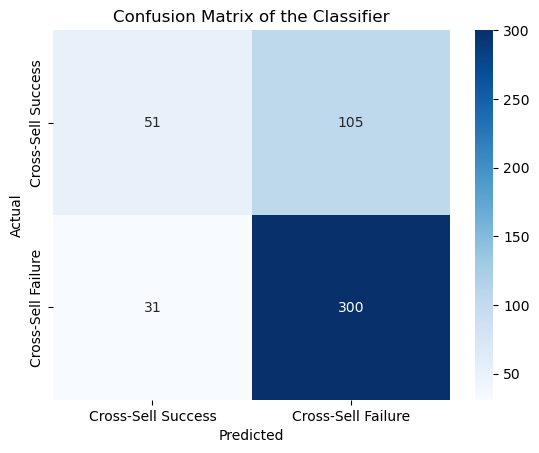

In [45]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Cross-Sell Success', 'Cross-Sell Failure'])

**4) Hyperparameter Tuning:**

In [46]:
# # HYPERPARAMETER TUNING for LOGISTIC REGRESSION #

# #Importing necessary libraries and functions

# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer                 # customizable scorer

# # declaring a hyperparameter space
# C_space          = np.arange(0.1, 5.0, 0.1)
# solver_space     = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']



# # creating a hyperparameter grid
# param_grid = {'C'          : C_space,
#               'solver'     : solver_space,
#               }


# #the model object without hyperparameters
# logreg_tuned = LogisticRegression(random_state = 219)

# # GridSearchCV object paramters
# logreg_tuned_cv = RandomizedSearchCV(estimator       = logreg_tuned,  
#                                  param_distributions = param_grid, 
#                                  cv                  = 3,         
#                                  n_iter              = 1000,        
#                                  random_state        = 219,
#                                  scoring             = make_scorer(
#                                                            roc_auc_score,
#                                                            needs_threshold = False)) # scoring criteria (AUC)
                              
                                            

# # FITTING to the FULL DATASET (due to cross-validation)
# logreg_tuned_cv.fit(chef_data, chef_target)

# # printing the optimal parameters and best score
# print("Tuned Parameters  :", logreg_tuned_cv.best_params_)
# print("Tuned CV AUC      :", logreg_tuned_cv.best_score_.round(4))


**5) Tuned Logistic Regression**

In [47]:
# INSTANTIATING a logistic regression model
model_name = 'Logistic Regression - Tuned'
logreg_tuned = LogisticRegression(solver = 'liblinear',
                                  C = 0.6,
                                  random_state = 219)


# FITTING the training data
logreg_tuned_fit = logreg_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_tuned_pred = logreg_tuned_fit.predict(x_test)


# saving scoring data for future use
logreg_tuned_train_score = logreg_tuned_fit.score(x_train, y_train).round(4) # accuracy
logreg_tuned_test_score  = logreg_tuned_fit.score(x_test, y_test).round(4) # accuracy
logreg_tuned_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_tuned_pred).round(decimals = 4)
logreg_tuned_train_test_gap = abs(logreg_tuned_train_score - logreg_tuned_test_score).round(4)

# unpacking the confusion matrix
logreg_tuned_tn, \
logreg_tuned_fp, \
logreg_tuned_fn, \
logreg_tuned_tp = confusion_matrix(y_true = y_test, y_pred = logreg_tuned_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {logreg_tuned_train_score}
Test_Score       : {logreg_tuned_test_score}
Train-Test Gap   : {logreg_tuned_train_test_gap}
AUC Score        : {logreg_tuned_auc_score}
Confusion Matrix : TN = {logreg_tuned_tn}, FP = {logreg_tuned_fp}, FN = {logreg_tuned_fn}, TP = {logreg_tuned_tp}
"""
print(output_model)





Model Name       : Logistic Regression - Tuned
Train_Score      : 0.7204
Test_Score       : 0.7269
Train-Test Gap   : 0.0065
AUC Score        : 0.6212
Confusion Matrix : TN = 51, FP = 105, FN = 28, TP = 303



**Analysis:** The overall accuracy of the tuned logistic regression model is relatively good, since it has a good train and test score and a very minute train-test gap which indicates the model is not overfitting to the training data. The AUC score of 0.62 indicates that the model has decent ability to distinguish between the positive and negative classes (cross-sell success vs. no cross-sell success).

## CART Models

For our CART models, we will check the performance of all sets as above and choose the set based on the best performing one.

In [48]:
# explanatory sets 

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['log_REVENUE','UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'log_TOTAL_MEALS_ORDERED', 
                   'CANCELLATIONS_AFTER_NOON', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'CUST_SERV_TO_TOTAL',
                   'TOTAL_PHOTOS_VIEWED', 'Personal', 'Professional', 'HIGH_CONTACTS', 'LOW_CONTACTS', 'HIGH_RATING',
                   'LOW_RATING', 'LARGE_ORDERER', 'SMALL_ORDERER', 'LATE_DELIVERIES', 'WP_ABV_AVG',  
                   'TOTAL_LOGINS', 'LATE_TO_TOTAL', 'CANCEL_TO_TOTAL', 'UNIQUE_TO_TOTAL','REV_ABV_AVG',
                  'ORDERS_TO_LOGINS', 'AVG_PRICE_PER_MEAL', 'TOTAL_ENGAGEMENT', 'TOTAL_ORDER_VALUE','CANCEL_TO_log_TOTAL' ],
                                                                
                                                                                                             

 # significant variables only (set 1)
 'logit_sig_1'    : ['UNIQUE_MEALS_PURCH' , 'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'Personal',
                   'Professional', 'SMALL_ORDERER'],
    
                                                             
  # significant variables only (set 2)
 'logit_sig_2'    : ['log_TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH' , 'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'Personal',
                   'Professional']  ,
                                                             

  # significant variables only (set 3)
 'logit_sig_3'    : [  'CANCELLATIONS_AFTER_NOON', 'TOTAL_LOGINS', 'Personal',
                   'Professional']  ,



}

### <u>DECISION TREE

**1) Full Decision Tree:**

- Full set

In [49]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)

# INSTANTIATING a classification tree object
model_name = 'Full Decision Tree'
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# saving scoring data for future use
full_tree_train_score_f = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score_f  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

full_tree_auc_score_f   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc
full_tree_train_test_gap_f = abs(full_tree_train_score_f - full_tree_test_score_f).round(4) # train-test gap


# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_tree_train_score_f}
Test_Score       : {full_tree_test_score_f}
Train-Test Gap   : {full_tree_train_test_gap_f}
AUC Score        : {full_tree_auc_score_f}
Confusion Matrix : TN = {full_tree_tn}, FP = {full_tree_fp}, FN = {full_tree_fn}, TP = {full_tree_tp}
"""
print(output_model)




Model Name       : Full Decision Tree
Train_Score      : 1.0
Test_Score       : 0.6632
Train-Test Gap   : 0.3368
AUC Score        : 0.6099
Confusion Matrix : TN = 72, FP = 84, FN = 80, TP = 251



- Set: logit_sig_1

In [50]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_1']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)

# INSTANTIATING a classification tree object
model_name = 'Full Decision Tree'
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# saving scoring data for future use
full_tree_train_score_1 = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score_1  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

full_tree_auc_score_1   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc
full_tree_train_test_gap_1 = abs(full_tree_train_score_1 - full_tree_test_score_1).round(4) # train-test gap


# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_tree_train_score_1}
Test_Score       : {full_tree_test_score_1}
Train-Test Gap   : {full_tree_train_test_gap_1}
AUC Score        : {full_tree_auc_score_1}
Confusion Matrix : TN = {full_tree_tn}, FP = {full_tree_fp}, FN = {full_tree_fn}, TP = {full_tree_tp}
"""
print(output_model)



Model Name       : Full Decision Tree
Train_Score      : 0.8225
Test_Score       : 0.6571
Train-Test Gap   : 0.1654
AUC Score        : 0.6122
Confusion Matrix : TN = 76, FP = 80, FN = 87, TP = 244



- Set: logit_set_2

In [51]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)

# INSTANTIATING a classification tree object
model_name = 'Full Decision Tree'
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# saving scoring data for future use
full_tree_train_score_2 = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score_2  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

full_tree_auc_score_2   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc
full_tree_train_test_gap_2 = abs(full_tree_train_score_2 - full_tree_test_score_2).round(4) # train-test gap


# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_tree_train_score_2}
Test_Score       : {full_tree_test_score_2}
Train-Test Gap   : {full_tree_train_test_gap_2}
AUC Score        : {full_tree_auc_score_2}
Confusion Matrix : TN = {full_tree_tn}, FP = {full_tree_fp}, FN = {full_tree_fn}, TP = {full_tree_tp}
"""
print(output_model)



Model Name       : Full Decision Tree
Train_Score      : 0.9801
Test_Score       : 0.6242
Train-Test Gap   : 0.3559
AUC Score        : 0.5677
Confusion Matrix : TN = 64, FP = 92, FN = 91, TP = 240



- Set: logit_sig_3

In [52]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_3']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)

# INSTANTIATING a classification tree object
model_name = 'Full Decision Tree'
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# saving scoring data for future use
full_tree_train_score_3 = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score_3  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

full_tree_auc_score_3   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc
full_tree_train_test_gap_3 = abs(full_tree_train_score_3 - full_tree_test_score_3).round(4) # train-test gap


# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_tree_train_score_3}
Test_Score       : {full_tree_test_score_3}
Train-Test Gap   : {full_tree_train_test_gap_3}
AUC Score        : {full_tree_auc_score_3}
Confusion Matrix : TN = {full_tree_tn}, FP = {full_tree_fp}, FN = {full_tree_fn}, TP = {full_tree_tp}
"""
print(output_model)



Model Name       : Full Decision Tree
Train_Score      : 0.7382
Test_Score       : 0.7207
Train-Test Gap   : 0.0175
AUC Score        : 0.6285
Confusion Matrix : TN = 58, FP = 98, FN = 38, TP = 293



As can be seen from the above, the set logit_sig_3 performs the best in terms of Train score and  Train-test gap and AUC score as compared to other sets. <br>
Hence, we will consider logit_sig_3 as the best set for decision tree.

**2) Hyperparameter Tuning:**

In [53]:
# # HYPERPARAMETER TUNING for DECISION TREE #

# #Importing necessary libraries and functions

# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer                 # customizable scorer

# # declaring a hyperparameter space
# criterion_space = ['gini', 'entropy']
# splitter_space  = ['best', 'random']
# depth_space     = np.arange(1, 8, 1) 
# leaf_space      = np.arange(1, 300, 1)


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_space,
#               'splitter'         : splitter_space,
#               'max_depth'        : depth_space,
#               'min_samples_leaf' : leaf_space}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = 219)
# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                    param_distributions   = param_grid,
#                                    cv                    = 3,
#                                    n_iter                = 1000, 
#                                    random_state          = 219,
#                                    scoring = make_scorer(roc_auc_score,
#                                              needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(chef_data, chef_target)



# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_tree_cv.best_params_)
# print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

**3) Tuned Decision Tree:**

In [54]:
# INSTANTIATING a classification tree object
model_name = 'Tuned Decision Tree'
tuned_tree = DecisionTreeClassifier(max_depth=5, 
                                    splitter = 'random',
                                    criterion = 'entropy',
                                    min_samples_leaf=6, 
                                    random_state=219)


# FITTING the training data
tuned_tree_fit = tuned_tree.fit(x_train, y_train)


# PREDICTING on new data
tuned_tree_pred = tuned_tree_fit.predict(x_test)


# saving scoring data for future use
tuned_tree_train_score = tuned_tree_fit.score(x_train, y_train).round(4) # accuracy
tuned_tree_test_score  = tuned_tree_fit.score(x_test, y_test).round(4)   # accuracy

tuned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = tuned_tree_pred).round(4) # auc
tuned_tree_train_test_gap = abs(tuned_tree_train_score - tuned_tree_test_score).round(4) # train-test gap


# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tuned_tree_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {tuned_tree_train_score}
Test_Score       : {tuned_tree_test_score}
Train-Test Gap   : {tuned_tree_train_test_gap}
AUC Score        : {tuned_tree_auc_score}
Confusion Matrix : TN = {tuned_tree_tn}, FP = {tuned_tree_fp}, FN = {tuned_tree_fn}, TP = {tuned_tree_tp}
"""
print(output_model)




Model Name       : Tuned Decision Tree
Train_Score      : 0.7204
Test_Score       : 0.7207
Train-Test Gap   : 0.0003
AUC Score        : 0.6404
Confusion Matrix : TN = 65, FP = 91, FN = 45, TP = 286



**Analysis:** The overall accuracy of the tuned decision tree model is relatively good, since it has a good train and test score and a very minute train-test gap which indicates the model is not overfitting to the training data. The AUC score of 0.64 indicates that the model has good predictive power in comparison to a random model to distinguish between the positive and negative classes (cross-sell success vs. no cross-sell success).


### <u> RANDOM FOREST

**1) Full Random Forest:**

- Full set

In [55]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
model_name = 'Full Random Forest'
full_rf = RandomForestClassifier()


# FITTING the training data
full_rf_fit = full_rf.fit(x_train, y_train)


# PREDICTING on new data
full_rf_pred = full_rf_fit.predict(x_test)


# saving scoring data for future use
full_rf_train_score_f = full_rf_fit.score(x_train, y_train).round(4) # accuracy
full_rf_test_score_f  = full_rf_fit.score(x_test, y_test).round(4)   # accuracy
full_rf_auc_score_f   = roc_auc_score(y_true  = y_test,
                                      y_score = full_rf_pred).round(4) # auc
full_rf_train_test_gap_f = abs(full_rf_train_score_f - full_rf_test_score_f).round(4) # train-test gap

# unpacking the confusion matrix
full_rf_tn, \
full_rf_fp, \
full_rf_fn, \
full_rf_tp = confusion_matrix(y_true = y_test, y_pred = full_rf_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_rf_train_score_f}
Test_Score       : {full_rf_test_score_f}
Train-Test Gap   : {full_rf_train_test_gap_f}
AUC Score        : {full_rf_auc_score_f}
Confusion Matrix : TN = {full_rf_tn}, FP = {full_rf_fp}, FN = {full_rf_fn}, TP = {full_rf_tp}
"""
print(output_model)





Model Name       : Full Random Forest
Train_Score      : 1.0
Test_Score       : 0.6797
Train-Test Gap   : 0.3203
AUC Score        : 0.5559
Confusion Matrix : TN = 33, FP = 123, FN = 33, TP = 298



- Set : logit_sig_1

In [56]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_1']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
model_name = 'Full Random Forest'
full_rf = RandomForestClassifier()


# FITTING the training data
full_rf_fit = full_rf.fit(x_train, y_train)


# PREDICTING on new data
full_rf_pred = full_rf_fit.predict(x_test)


# saving scoring data for future use
full_rf_train_score_1 = full_rf_fit.score(x_train, y_train).round(4) # accuracy
full_rf_test_score_1  = full_rf_fit.score(x_test, y_test).round(4)   # accuracy
full_rf_auc_score_1   = roc_auc_score(y_true  = y_test,
                                      y_score = full_rf_pred).round(4) # auc
full_rf_train_test_gap_1 = abs(full_rf_train_score_1 - full_rf_test_score_1).round(4) # train-test gap

# unpacking the confusion matrix
full_rf_tn, \
full_rf_fp, \
full_rf_fn, \
full_rf_tp = confusion_matrix(y_true = y_test, y_pred = full_rf_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_rf_train_score_1}
Test_Score       : {full_rf_test_score_1}
Train-Test Gap   : {full_rf_train_test_gap_1}
AUC Score        : {full_rf_auc_score_1}
Confusion Matrix : TN = {full_rf_tn}, FP = {full_rf_fp}, FN = {full_rf_fn}, TP = {full_rf_tp}
"""
print(output_model)





Model Name       : Full Random Forest
Train_Score      : 0.8225
Test_Score       : 0.655
Train-Test Gap   : 0.1675
AUC Score        : 0.5903
Confusion Matrix : TN = 64, FP = 92, FN = 76, TP = 255



- Set : logit_sig_2

In [57]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
model_name = 'Full Random Forest'
full_rf = RandomForestClassifier()


# FITTING the training data
full_rf_fit = full_rf.fit(x_train, y_train)


# PREDICTING on new data
full_rf_pred = full_rf_fit.predict(x_test)


# saving scoring data for future use
full_rf_train_score_2 = full_rf_fit.score(x_train, y_train).round(4) # accuracy
full_rf_test_score_2  = full_rf_fit.score(x_test, y_test).round(4)   # accuracy
full_rf_auc_score_2   = roc_auc_score(y_true  = y_test,
                                      y_score = full_rf_pred).round(4) # auc
full_rf_train_test_gap_2 = abs(full_rf_train_score_2 - full_rf_test_score_2).round(4) # train-test gap

# unpacking the confusion matrix
full_rf_tn, \
full_rf_fp, \
full_rf_fn, \
full_rf_tp = confusion_matrix(y_true = y_test, y_pred = full_rf_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_rf_train_score_2}
Test_Score       : {full_rf_test_score_2}
Train-Test Gap   : {full_rf_train_test_gap_2}
AUC Score        : {full_rf_auc_score_2}
Confusion Matrix : TN = {full_rf_tn}, FP = {full_rf_fp}, FN = {full_rf_fn}, TP = {full_rf_tp}
"""
print(output_model)





Model Name       : Full Random Forest
Train_Score      : 0.9801
Test_Score       : 0.6735
Train-Test Gap   : 0.3066
AUC Score        : 0.609
Confusion Matrix : TN = 67, FP = 89, FN = 70, TP = 261



- Set: logit_sig_3

In [58]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_3']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
model_name = 'Full Random Forest'
full_rf = RandomForestClassifier()


# FITTING the training data
full_rf_fit = full_rf.fit(x_train, y_train)


# PREDICTING on new data
full_rf_pred = full_rf_fit.predict(x_test)


# saving scoring data for future use
full_rf_train_score_3 = full_rf_fit.score(x_train, y_train).round(4) # accuracy
full_rf_test_score_3  = full_rf_fit.score(x_test, y_test).round(4)   # accuracy
full_rf_auc_score_3   = roc_auc_score(y_true  = y_test,
                                      y_score = full_rf_pred).round(4) # auc
full_rf_train_test_gap_3 = abs(full_rf_train_score_3 - full_rf_test_score_3).round(4) # train-test gap

# unpacking the confusion matrix
full_rf_tn, \
full_rf_fp, \
full_rf_fn, \
full_rf_tp = confusion_matrix(y_true = y_test, y_pred = full_rf_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_rf_train_score_3}
Test_Score       : {full_rf_test_score_3}
Train-Test Gap   : {full_rf_train_test_gap_3}
AUC Score        : {full_rf_auc_score_3}
Confusion Matrix : TN = {full_rf_tn}, FP = {full_rf_fp}, FN = {full_rf_fn}, TP = {full_rf_tp}
"""
print(output_model)





Model Name       : Full Random Forest
Train_Score      : 0.7382
Test_Score       : 0.7187
Train-Test Gap   : 0.0195
AUC Score        : 0.6219
Confusion Matrix : TN = 55, FP = 101, FN = 36, TP = 295



As can be seen from the above, the set logit_sig_3 performs the best in terms of Train score and  Train-test gap and AUC score as compared to other sets. <br>
Hence, we will consider logit_sig_3 as the best set for random forest.

**2) Hyperparameter Tuning:**

In [59]:
# # HYPERPARAMETER TUNING for RANDOM FOREST #

# #Importing necessary libraries and functions

# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer                 # customizable scorer

# # declaring a hyperparameter space
# criterion_space       = ['gini', 'entropy']
# bootstrap_space       = [True, False]
# warm_start_space      = [True, False]
# depth_space           = np.arange(1, 8, 1) 
# leaf_space            = np.arange(1, 150, 1)
# n_estimators_space    = np.arange(100, 800, 100) 


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_space,
#               'bootstrap'        : bootstrap_space,
#               'warm_start'       : warm_start_space,
#               'max_depth'        : depth_space,
#               'min_samples_leaf' : leaf_space,
#                'n_estimators'    : n_estimators_space}


# # INSTANTIATING the model object without hyperparameters
# tuned_rf = RandomForestClassifier(random_state = 219)
# # RandomizedSearchCV object
# tuned_rf_cv = RandomizedSearchCV(estimator             = tuned_rf,
#                                    param_distributions   = param_grid,
#                                    cv                    = 3,
#                                    n_iter                = 1000, 
#                                    random_state          = 219,
#                                    scoring = make_scorer(roc_auc_score,
#                                              needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_rf_cv.fit(chef_data, chef_target)



# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_rf_cv.best_params_)
# print("Tuned Training AUC:", tuned_rf_cv.best_score_.round(4))

**3) Tuned Random Forest:**

In [60]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

# INSTANTIATING a classification tree object
model_name = 'Tuned Random Forest'
tuned_rf = RandomForestClassifier(max_depth=7, 
                                  warm_start = False,
                                  criterion = 'entropy',
                                  min_samples_leaf=6, 
                                  bootstrap = False,
                                  n_estimators = 100,
                                  random_state=219)


# FITTING the training data
tuned_rf_fit = tuned_rf.fit(x_train, y_train)


# PREDICTING on new data
tuned_rf_pred = tuned_rf_fit.predict(x_test)


# saving scoring data for future use
tuned_rf_train_score = tuned_rf_fit.score(x_train, y_train).round(4) # accuracy
tuned_rf_test_score  = tuned_rf_fit.score(x_test, y_test).round(4)   # accuracy
tuned_rf_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = tuned_rf_pred).round(4) # auc
tuned_rf_train_test_gap = abs(tuned_rf_train_score - tuned_rf_test_score).round(4) # train-test gap

# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = full_rf_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {tuned_rf_train_score}
Test_Score       : {tuned_rf_test_score}
Train-Test Gap   : {tuned_rf_train_test_gap}
AUC Score        : {tuned_rf_auc_score}
Confusion Matrix : TN = {tuned_rf_tn}, FP = {tuned_rf_fp}, FN = {tuned_rf_fn}, TP = {tuned_rf_tp}
"""
print(output_model)





Model Name       : Tuned Random Forest
Train_Score      : 0.7341
Test_Score       : 0.7248
Train-Test Gap   : 0.0093
AUC Score        : 0.623
Confusion Matrix : TN = 55, FP = 101, FN = 36, TP = 295



**Analysis:** The overall accuracy of the tuned decision tree model is good, since it has a good train and test score and a train-test gap of 0.0093 which is slightly higher as compared to the models tested until now.The AUC score of 0.62 indicates that the Random Forest model is able to correctly classify 62% of the data into respective target classes correctly. 

### <U> GRADIENT BOOSTING CLASSIFIER

**1) FULL GBM:**

- Full Set

In [61]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier      # GBM

# INSTANTIATING a classification tree object
model_name = 'Full Gradient Boosting Classifier'
full_gbm = GradientBoostingClassifier()


# FITTING the training data
full_gbm_fit = full_gbm.fit(x_train, y_train)


# PREDICTING on new data
full_gbm_pred = full_gbm_fit.predict(x_test)


# saving scoring data for future use
full_gbm_train_score_f = full_gbm_fit.score(x_train, y_train).round(4) # accuracy
full_gbm_test_score_f  = full_gbm_fit.score(x_test, y_test).round(4)   # accuracy
full_gbm_auc_score_f   = roc_auc_score(y_true  = y_test,
                                      y_score = full_gbm_pred).round(4) # auc
full_gbm_train_test_gap_f = abs(full_gbm_train_score_f - full_gbm_test_score_f).round(4) # train-test gap

# unpacking the confusion matrix
full_gbm_tn, \
full_gbm_fp, \
full_gbm_fn, \
full_gbm_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_gbm_train_score_f}
Test_Score       : {full_gbm_test_score_f}
Train-Test Gap   : {full_gbm_train_test_gap_f}
AUC Score        : {full_gbm_auc_score_f}
Confusion Matrix : TN = {full_gbm_tn}, FP = {full_gbm_fp}, FN = {full_gbm_fn}, TP = {full_gbm_tp}
"""
print(output_model)






Model Name       : Full Gradient Boosting Classifier
Train_Score      : 0.8184
Test_Score       : 0.694
Train-Test Gap   : 0.1244
AUC Score        : 0.5851
Confusion Matrix : TN = 44, FP = 112, FN = 37, TP = 294



- Set : logit_sig_1

In [62]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_1']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier      # GBM

# INSTANTIATING a classification tree object
model_name = 'Full Gradient Boosting Classifier'
full_gbm = GradientBoostingClassifier()


# FITTING the training data
full_gbm_fit = full_gbm.fit(x_train, y_train)


# PREDICTING on new data
full_gbm_pred = full_gbm_fit.predict(x_test)


# saving scoring data for future use
full_gbm_train_score_1 = full_gbm_fit.score(x_train, y_train).round(4) # accuracy
full_gbm_test_score_1  = full_gbm_fit.score(x_test, y_test).round(4)   # accuracy
full_gbm_auc_score_1   = roc_auc_score(y_true  = y_test,
                                      y_score = full_gbm_pred).round(4) # auc
full_gbm_train_test_gap_1 = abs(full_gbm_train_score_1 - full_gbm_test_score_1).round(4) # train-test gap

# unpacking the confusion matrix
full_gbm_tn, \
full_gbm_fp, \
full_gbm_fn, \
full_gbm_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_gbm_train_score_1}
Test_Score       : {full_gbm_test_score_1}
Train-Test Gap   : {full_gbm_train_test_gap_1}
AUC Score        : {full_gbm_auc_score_1}
Confusion Matrix : TN = {full_gbm_tn}, FP = {full_gbm_fp}, FN = {full_gbm_fn}, TP = {full_gbm_tp}
"""
print(output_model)



Model Name       : Full Gradient Boosting Classifier
Train_Score      : 0.7423
Test_Score       : 0.729
Train-Test Gap   : 0.0133
AUC Score        : 0.6261
Confusion Matrix : TN = 53, FP = 103, FN = 29, TP = 302



- Set : logit_set_2

In [63]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_2']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier      # GBM

# INSTANTIATING a classification tree object
model_name = 'Full Gradient Boosting Classifier'
full_gbm = GradientBoostingClassifier()


# FITTING the training data
full_gbm_fit = full_gbm.fit(x_train, y_train)


# PREDICTING on new data
full_gbm_pred = full_gbm_fit.predict(x_test)


# saving scoring data for future use
full_gbm_train_score_2 = full_gbm_fit.score(x_train, y_train).round(4) # accuracy
full_gbm_test_score_2  = full_gbm_fit.score(x_test, y_test).round(4)   # accuracy
full_gbm_auc_score_2   = roc_auc_score(y_true  = y_test,
                                      y_score = full_gbm_pred).round(4) # auc
full_gbm_train_test_gap_2 = abs(full_gbm_train_score_2 - full_gbm_test_score_2).round(4) # train-test gap

# unpacking the confusion matrix
full_gbm_tn, \
full_gbm_fp, \
full_gbm_fn, \
full_gbm_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_gbm_train_score_2}
Test_Score       : {full_gbm_test_score_2}
Train-Test Gap   : {full_gbm_train_test_gap_2}
AUC Score        : {full_gbm_auc_score_2}
Confusion Matrix : TN = {full_gbm_tn}, FP = {full_gbm_fp}, FN = {full_gbm_fn}, TP = {full_gbm_tp}
"""
print(output_model)



Model Name       : Full Gradient Boosting Classifier
Train_Score      : 0.7656
Test_Score       : 0.7207
Train-Test Gap   : 0.0449
AUC Score        : 0.6149
Confusion Matrix : TN = 50, FP = 106, FN = 30, TP = 301



- Set : logit_sig_3

In [64]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_3']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier      # GBM

# INSTANTIATING a classification tree object
model_name = 'Full Gradient Boosting Classifier'
full_gbm = GradientBoostingClassifier()


# FITTING the training data
full_gbm_fit = full_gbm.fit(x_train, y_train)


# PREDICTING on new data
full_gbm_pred = full_gbm_fit.predict(x_test)


# saving scoring data for future use
full_gbm_train_score_3 = full_gbm_fit.score(x_train, y_train).round(4) # accuracy
full_gbm_test_score_3  = full_gbm_fit.score(x_test, y_test).round(4)   # accuracy
full_gbm_auc_score_3   = roc_auc_score(y_true  = y_test,
                                      y_score = full_gbm_pred).round(4) # auc
full_gbm_train_test_gap_3 = abs(full_gbm_train_score_3 - full_gbm_test_score_3).round(4) # train-test gap

# unpacking the confusion matrix
full_gbm_tn, \
full_gbm_fp, \
full_gbm_fn, \
full_gbm_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_gbm_train_score_3}
Test_Score       : {full_gbm_test_score_3}
Train-Test Gap   : {full_gbm_train_test_gap_3}
AUC Score        : {full_gbm_auc_score_3}
Confusion Matrix : TN = {full_gbm_tn}, FP = {full_gbm_fp}, FN = {full_gbm_fn}, TP = {full_gbm_tp}
"""
print(output_model)



Model Name       : Full Gradient Boosting Classifier
Train_Score      : 0.7341
Test_Score       : 0.729
Train-Test Gap   : 0.0051
AUC Score        : 0.6295
Confusion Matrix : TN = 55, FP = 101, FN = 31, TP = 300



As can be seen from the above, the set logit_sig_3 performs the best in terms of overall parameters, especially AUC score as compared to other sets. <br>
Hence, we will consider logit_sig_3 as the best set for Gradient Bossting Classifier.

**2) Hyperparameter Tuning:**

In [65]:
# # HYPERPARAMETER TUNING for GRADIENT BOOSTING MODEL #

# #Importing necessary libraries and functions

# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer                 # customizable scorer



# learn_space        = np.arange(0.01, 0.2, 0.01)      
# depth_space        = np.arange(1, 8, 1)    
# loss_space         = ['deviance', 'exponential']
# n_estimators_space = np.arange(50, 1000, 50) 
# criterion_space    = ['friedman_mse', 'squared_error']


# #max_features_space = [True, False]


# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_space,
#               'max_depth'     : depth_space,
#               'n_estimators'  : n_estimators_space,
#               'loss'          : loss_space,
#               'criterion'     : criterion_space
             
#              }


# # INSTANTIATING the model object without hyperparameters
# tuned_gbm = GradientBoostingClassifier(random_state = 219)


# # RandomSearchCV object
# tuned_gbm_cv = RandomizedSearchCV(estimator           = tuned_gbm,
#                                  param_distributions  = param_grid,
#                                  cv                   = 3,
#                                  n_iter               = 1000,
#                                  random_state         = 219,
#                                  scoring              = make_scorer(roc_auc_score,
#                                                        needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_gbm_cv.fit(chef_data, chef_target)


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_gbm_cv.best_params_)
# print("Tuned Training AUC:", tuned_gbm_cv.best_score_.round(4))


**3) Tuned Gradient Boosting Classifier:**

In [66]:
# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier      # GBM

# INSTANTIATING a classification tree object
model_name = 'Tuned Gradient Boosting Classifier'
tuned_gbm = GradientBoostingClassifier(max_depth= 2, 
                                  loss = 'exponential',
                                  learning_rate = 0.17,   
                                  criterion = 'squared_error',
                                  n_estimators = 250,
                                  random_state=219)


# FITTING the training data
tuned_gbm_fit = tuned_gbm.fit(x_train, y_train)


# PREDICTING on new data
tuned_gbm_pred = tuned_gbm_fit.predict(x_test)


# saving scoring data for future use
tuned_gbm_train_score = tuned_gbm_fit.score(x_train, y_train).round(4) # accuracy
tuned_gbm_test_score  = tuned_gbm_fit.score(x_test, y_test).round(4)   # accuracy
tuned_gbm_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = tuned_gbm_pred).round(4) # auc
tuned_gbm_train_test_gap = abs(tuned_gbm_train_score - tuned_gbm_test_score).round(4) # train-test gap

# unpacking the confusion matrix
tuned_gbm_tn, \
tuned_gbm_fp, \
tuned_gbm_fn, \
tuned_gbm_tp = confusion_matrix(y_true = y_test, y_pred = tuned_gbm_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {tuned_gbm_train_score}
Test_Score       : {tuned_gbm_test_score}
Train-Test Gap   : {tuned_gbm_train_test_gap}
AUC Score        : {tuned_gbm_auc_score}
Confusion Matrix : TN = {tuned_gbm_tn}, FP = {tuned_gbm_fp}, FN = {tuned_gbm_fn}, TP = {tuned_gbm_tp}
"""
print(output_model)



Model Name       : Tuned Gradient Boosting Classifier
Train_Score      : 0.7341
Test_Score       : 0.7248
Train-Test Gap   : 0.0093
AUC Score        : 0.6264
Confusion Matrix : TN = 55, FP = 101, FN = 33, TP = 298



**Analysis:** The above Tuned Gradient Boosting Classifier model has a training score of 0.7341 and a testing score of 0.7248, with a small gap of 0.0093 between them. The AUC score for the model is 0.6264, which indicates that it has relatively decent ability to differentiate between positive and negative classes. 

<br>

## Part V : Summary of all Models and explanatory sets

In [67]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}

Performance - Untuned (AUC):

-> Logistic Regression          : {logreg_auc_score_f}
-> Decision Tree Classifier     : {full_tree_auc_score_f}
-> Random Forest Classifier     : {full_rf_auc_score_f}
-> Gradient Boosting Classifier : {full_gbm_auc_score_f}

First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig_1']}

Performance - Untuned (AUC):

-> Logistic Regression          : {logreg_auc_score_1}
-> Decision Tree Classifier     : {full_tree_auc_score_1}
-> Random Forest Classifier     : {full_rf_auc_score_1}
-> Gradient Boosting Classifier : {full_gbm_auc_score_1}

Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}

Performance - Untuned (AUC):

-> Logistic Regression          : {logreg_auc_score_2} 
-> Decision Tree Classifier     : {full_tree_auc_score_2}
-> Random Forest Classifier     : {full_rf_auc_score_2}
-> Gradient Boosting Classifier : {full_gbm_auc_score_2}

Third Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_3']}

Performance - Untuned (AUC):

-> Logistic Regression          : {logreg_auc_score_3}
-> Decision Tree Classifier     : {full_tree_auc_score_3}
-> Random Forest Classifier     : {full_rf_auc_score_3}
-> Gradient Boosting Classifier : {full_gbm_auc_score_3}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['log_REVENUE', 'UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'log_TOTAL_MEALS_ORDERED', 'CANCELLATIONS_AFTER_NOON', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'CUST_SERV_TO_TOTAL', 'TOTAL_PHOTOS_VIEWED', 'Personal', 'Professional', 'HIGH_CONTACTS', 'LOW_CONTACTS', 'HIGH_RATING', 'LOW_RATING', 'LARGE_ORDERER', 'SMALL_ORDERER', 'LATE_DELIVERIES', 'WP_ABV_AVG', 'TOTAL_LOGINS', 'LATE_TO_TOTAL', 'CANCEL_TO_TOTAL', 'UNIQUE_TO_TOTAL', 'REV_ABV_AVG', 'ORDERS_TO_LOGINS', 'AVG_PRICE_PER_MEAL', 'TOTAL_ENGAGEMENT', 'TOTAL_ORDER_VALUE', 'CANCEL_TO_log_TOTAL']

Performance - Untuned (AUC):

-> Logistic Regression          : 0.5
-> Decision Tree Classifier     : 0.6099
-> Random Forest Classifier     : 0.5559
-> Gradient Boosting Classifier : 0.5851

First Significant p-value Model:
--------------------------------
['UNIQUE_MEALS_PURCH', 'CANCELLATIONS_AFTE

Summary of all models tested (Tuned and Untuned):

In [68]:
# comparing results
print(f"""
Model                   AUC Score                     TN, FP, FN, TP
-----                   ---------                     --------------
Logistic Untuned    {logreg_auc_score_2}              {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Logistic Tuned      {logreg_tuned_auc_score}          {logreg_tuned_tn, logreg_tuned_fp, logreg_tuned_fn, logreg_tuned_tp}
Full Tree           {full_tree_auc_score_3}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Tuned Tree          {tuned_tree_auc_score}            {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
Full Forest         {full_rf_auc_score_3}             {full_rf_tn, full_rf_fp, full_rf_fn, full_rf_tp}
Tuned Forest        {tuned_rf_auc_score}              {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp}
Full GBM            {full_gbm_auc_score_3}            {full_gbm_tn, full_gbm_fp, full_gbm_fn, full_gbm_tp}
Tuned GBM           {tuned_gbm_auc_score}             {tuned_gbm_tn, tuned_gbm_fp, tuned_gbm_fn, tuned_gbm_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic Untuned', 'Logistic Tuned', 'Full Tree', 'Tuned Tree','Full Forest', 'Tuned Forest', 
                        'Full GBM', 'Tuned GBM'],
           
    'AUC Score' : [logreg_auc_score_2, logreg_tuned_auc_score, full_tree_auc_score_3, tuned_tree_auc_score,
                  full_rf_auc_score_3, tuned_rf_auc_score, full_gbm_auc_score_3, tuned_gbm_auc_score ],
    
    'Training Accuracy' : [logreg_train_score_2, logreg_tuned_train_score, full_tree_train_score_3, tuned_tree_train_score,
                           full_rf_train_score_3, tuned_rf_train_score, full_gbm_train_score_3, tuned_gbm_train_score],
           
    'Testing Accuracy'  : [logreg_test_score_2, logreg_tuned_test_score, full_tree_test_score_3, tuned_tree_test_score,
                           full_rf_test_score_3, tuned_rf_test_score, full_gbm_test_score_3, tuned_gbm_test_score],
    
    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (logreg_tuned_tn, logreg_tuned_fp, logreg_tuned_fn, logreg_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (full_rf_tn, full_rf_fp, full_rf_fn, full_rf_tp),
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp),
                           (full_gbm_tn, full_gbm_fp, full_gbm_fn, full_gbm_tp),
                           (tuned_gbm_tn, tuned_gbm_fp, tuned_gbm_fn, tuned_gbm_tp)
                          ]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model                   AUC Score                     TN, FP, FN, TP
-----                   ---------                     --------------
Logistic Untuned    0.6166              (51, 105, 31, 300)
Logistic Tuned      0.6212          (51, 105, 28, 303)
Full Tree           0.6285           (58, 98, 38, 293)
Tuned Tree          0.6404            (65, 91, 45, 286)
Full Forest         0.6219             (55, 101, 36, 295)
Tuned Forest        0.623              (55, 101, 36, 295)
Full GBM            0.6295            (55, 101, 31, 300)
Tuned GBM           0.6264             (55, 101, 33, 298)



## Part IV: Final Model

Based on all the models built in Part IV, **Tuned Decision Tree Classifier** appears to have the highest AUC score, test score, train score and least train-test gap. Hence, we will consider the same as our final model. <br>
<br>
Below is a snapshot of the entire model:

In [69]:
#----------------------------------------------------------------------------#
# STEP1: Creating the initial untuned model:
#----------------------------------------------------------------------------#


# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig_3']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train , x_test,y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)

# INSTANTIATING a classification tree object
model_name = 'Full Decision Tree'
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# saving scoring data for future use
full_tree_train_score_3 = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score_3  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

full_tree_auc_score_3   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc
full_tree_train_test_gap_3 = abs(full_tree_train_score_3 - full_tree_test_score_3).round(4) # train-test gap


# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {full_tree_train_score_3}
Test_Score       : {full_tree_test_score_3}
Train-Test Gap   : {full_tree_train_test_gap_3}
AUC Score        : {full_tree_auc_score_3}
Confusion Matrix : TN = {full_tree_tn}, FP = {full_tree_fp}, FN = {full_tree_fn}, TP = {full_tree_tp}
"""
print(output_model)



Model Name       : Full Decision Tree
Train_Score      : 0.7382
Test_Score       : 0.7207
Train-Test Gap   : 0.0175
AUC Score        : 0.6285
Confusion Matrix : TN = 58, FP = 98, FN = 38, TP = 293



In [70]:
#----------------------------------------------------------------------------#
# STEP2: Hyperparameter Tuning:
#----------------------------------------------------------------------------#


# # HYPERPARAMETER TUNING for DECISION TREE #

# #Importing necessary libraries and functions

# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import make_scorer                 # customizable scorer

# # declaring a hyperparameter space
# criterion_space = ['gini', 'entropy']
# splitter_space  = ['best', 'random']
# depth_space     = np.arange(1, 8, 1) 
# leaf_space      = np.arange(1, 300, 1)


# # creating a hyperparameter grid
# param_grid = {'criterion'        : criterion_space,
#               'splitter'         : splitter_space,
#               'max_depth'        : depth_space,
#               'min_samples_leaf' : leaf_space}


# # INSTANTIATING the model object without hyperparameters
# tuned_tree = DecisionTreeClassifier(random_state = 219)
# # RandomizedSearchCV object
# tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                    param_distributions   = param_grid,
#                                    cv                    = 3,
#                                    n_iter                = 1000, 
#                                    random_state          = 219,
#                                    scoring = make_scorer(roc_auc_score,
#                                              needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# tuned_tree_cv.fit(chef_data, chef_target)



# # printing the optimal parameters and best score
# print("Tuned Parameters  :", tuned_tree_cv.best_params_)
# print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [71]:
#----------------------------------------------------------------------------#
# STEP3: Final Tuned Model:
#----------------------------------------------------------------------------#


# INSTANTIATING a classification tree object
model_name = 'Tuned Decision Tree'
tuned_tree = DecisionTreeClassifier(max_depth=5, 
                                    splitter = 'random',
                                    criterion = 'entropy',
                                    min_samples_leaf=6, 
                                    random_state=219)


# FITTING the training data
tuned_tree_fit = tuned_tree.fit(x_train, y_train)


# PREDICTING on new data
tuned_tree_pred = tuned_tree_fit.predict(x_test)


# saving scoring data for future use
tuned_tree_train_score = tuned_tree_fit.score(x_train, y_train).round(4) # accuracy
tuned_tree_test_score  = tuned_tree_fit.score(x_test, y_test).round(4)   # accuracy

tuned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = tuned_tree_pred).round(4) # auc
tuned_tree_train_test_gap = abs(tuned_tree_train_score - tuned_tree_test_score).round(4) # train-test gap


# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tuned_tree_pred).ravel()


# Printing the final model output

output_model =  f"""\n
Model Name       : {model_name}
Train_Score      : {tuned_tree_train_score}
Test_Score       : {tuned_tree_test_score}
Train-Test Gap   : {tuned_tree_train_test_gap}
AUC Score        : {tuned_tree_auc_score}
Confusion Matrix : TN = {tuned_tree_tn}, FP = {tuned_tree_fp}, FN = {tuned_tree_fn}, TP = {tuned_tree_tp}
"""
print(output_model)




Model Name       : Tuned Decision Tree
Train_Score      : 0.7204
Test_Score       : 0.7207
Train-Test Gap   : 0.0003
AUC Score        : 0.6404
Confusion Matrix : TN = 65, FP = 91, FN = 45, TP = 286



**Confusion matrix description:** <br>
<br>


~~~
                                                         |
PREDICTED: CROSS SELL SUCCEEDED (CROSS_SELL_SUCCESS=0)   | PREDICTED: CROSS SELL FAILED (CROSS_SELL_SUCCESS=1)
ACTUAL:    CROSS SELL SUCCEEDED (CROSS_SELL_SUCCESS=0)   | ACTUAL:  CROSS SELL SUCCEEDED (CROSS_SELL_SUCCESS=0)
                                                         |
---------------------------------------------------------|-----------------------------------------------------
                                                         |
PREDICTED: CROSS SELL SUCCEEDED (CROSS_SELL_SUCCESS=0)   |  PREDICTED: CROSS SELL FAILED (CROSS_SELL_SUCCESS=1) 
ACTUAL:    CROSS SELL FAILED (CROSS_SELL_SUCCESS=1)      |  ACTUAL:    CROSS SELL FAILED (CROSS_SELL_SUCCESS=1) 
                                                         |  
~~~

**Interpretation of the confusion matrix for Tuned Decision Tree:** <br>
- True Positive (TP): 286 customers were correctly identified as likely to subscribe to the cross-sell promotion.
- False Positive (FP): 91 customers were incorrectly identified as likely to subscribe to the cross-sell promotion. This could result in targeting these customers through marketing efforts and potentially wasting resources if they are not interested in the promotion.
- False Negative (FN): 45 customers were incorrectly identified as unlikely to subscribe to the cross-sell promotion, when they would have actually been interested. This could result in missed sales opportunities for Apprentice Chef Inc.
- True Negative (TN): 65 customers were correctly identified as unlikely to subscribe to the cross-sell promotion.
<br>
As far as the drawbacks are concerned, a false positive (FP) error could result in wasted resources, as the company may target customers who are not interested in the promotion. On the other hand, a false negative (FN) error could result in missed sales opportunities, as the company may not target customers who would have been interested in the promotion. 

The company should try and minimize the FN since they may be more costly for the company as they represent missed sales opportunities. 





In [72]:
# Final Model Scores:

model_name = '\033[1;32mFINAL MODEL - Tuned Decision Tree\033[0m'

final_model =  f"""\n
\033[1mModel Name       :\033[0m  {model_name}
\033[1mTrain_Score      :\033[0m  {tuned_tree_train_score}
\033[1mTest_Score       :\033[0m  {tuned_tree_test_score}
\033[1mTrain-Test Gap   :\033[0m  {tuned_tree_train_test_gap}
\033[1mAUC Score        :\033[0m  {tuned_tree_auc_score}
\033[1mConfusion Matrix :\033[0m  TN = {tuned_tree_tn}, FP = {tuned_tree_fp}, FN = {tuned_tree_fn}, TP = {tuned_tree_tp}
"""
print(final_model)




Model Name       :  FINAL MODEL - Tuned Decision Tree
Train_Score      :  0.7204
Test_Score       :  0.7207
Train-Test Gap   :  0.0003
AUC Score        :  0.6404
Confusion Matrix :  TN = 65, FP = 91, FN = 45, TP = 286

